In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#lets load our data as it is in csv form so we can read data as 
data = pd.read_csv('Transactions.csv')
data.head(10)

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,1-11-2018-8205,11,1,مبايعات,Sales,بيع,Sell,13-08-2018,4,فيلا,...,NaN,0,34.41,165000.0,4795.12,NaN,NaN,1.0,2.0,0.0
1,1-11-2016-12930,11,1,مبايعات,Sales,بيع,Sell,02-11-2016,4,فيلا,...,NaN,0,390.00,2089900.0,5358.72,NaN,NaN,1.0,1.0,0.0
2,1-11-2016-13524,11,1,مبايعات,Sales,بيع,Sell,15-11-2016,4,فيلا,...,NaN,0,278.71,2800000.0,10046.28,NaN,NaN,1.0,1.0,0.0
3,2-13-2014-4939,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,23-06-2014,4,فيلا,...,NaN,0,16952.94,12000000.0,707.84,NaN,NaN,1.0,1.0,0.0
4,1-11-2003-1808,11,1,مبايعات,Sales,بيع,Sell,08-12-2003,4,فيلا,...,NaN,0,334.45,550000.0,1644.49,NaN,NaN,4.0,1.0,0.0
5,1-11-2000-258,11,1,مبايعات,Sales,بيع,Sell,17-04-2000,2,مبنى,...,NaN,0,232.26,900000.0,3874.97,NaN,NaN,4.0,1.0,0.0
6,2-13-2015-8572,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,23-11-2015,2,مبنى,...,NaN,0,891.87,11000000.0,12333.64,NaN,NaN,1.0,1.0,0.0
7,1-11-2014-22683,11,1,مبايعات,Sales,بيع,Sell,13-10-2014,2,مبنى,...,NaN,0,211.35,1800000.0,8516.68,NaN,NaN,1.0,1.0,0.0
8,3-9-2010-737,9,3,هبات,Gifts,هبه,Grant,11-10-2010,2,مبنى,...,NaN,0,211.35,2500000.0,11828.72,NaN,NaN,1.0,1.0,0.0
9,3-9-2013-610,9,3,هبات,Gifts,هبه,Grant,01-10-2013,2,مبنى,...,NaN,0,35.23,416700.0,11827.99,NaN,NaN,1.0,3.0,0.0


In [2]:
# Collect Garbages files
import gc
gc.collect()

18

In [59]:
data['instance_date'] = pd.to_datetime(data['instance_date'], errors='coerce') 
data.sort_values(by=['instance_date'], inplace=True)
data = data.loc[( data['instance_date'] >= '2012-01-01')]
data = data.loc[( data['instance_date'] < '2024-01-01')]
data

C:\Users\dk381\AppData\Local\Temp\ipykernel_11716\2665198124.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['instance_date'] = pd.to_datetime(data['instance_date'], errors='coerce')


,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
170904,1-110-2011-2950,110,1,مبايعات,Sales,تسجيل إيجارة تنتهى بالتملك,Lease to Own Registration,2012-01-02,1,أرض,...,NaN,0,540.14,3264800.0,6044.36,NaN,NaN,2.0,2.0,2.0
917182,2-13-2012-20,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,2012-01-02,4,فيلا,...,NaN,0,674.48,2640000.0,3914.13,NaN,NaN,1.0,1.0,0.0
864672,1-11-2012-8,11,1,مبايعات,Sales,بيع,Sell,2012-01-02,3,وحدة,...,Studio,1,48.10,345000.0,7172.56,NaN,NaN,1.0,1.0,0.0
376811,1-11-2011-20549,11,1,مبايعات,Sales,بيع,Sell,2012-01-02,4,فيلا,...,3 B/R,0,135.20,2200000.0,16272.19,NaN,NaN,1.0,1.0,0.0
958941,1-11-2012-23,11,1,مبايعات,Sales,بيع,Sell,2012-01-02,3,وحدة,...,NaN,0,67.00,374584.0,5590.81,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130633,1-102-2023-69437,102,1,مبايعات,Sales,بيع - تسجيل مبدئى,Sell - Pre registration,2023-12-29,3,وحدة,...,2 B/R,1,107.64,2270888.0,21097.06,NaN,NaN,1.0,2.0,0.0
912770,1-102-2023-69385,102,1,مبايعات,Sales,بيع - تسجيل مبدئى,Sell - Pre registration,2023-12-29,3,وحدة,...,1 B/R,1,57.44,1228500.0,21387.53,NaN,NaN,1.0,1.0,0.0
553094,1-102-2023-69442,102,1,مبايعات,Sales,بيع - تسجيل مبدئى,Sell - Pre registration,2023-12-29,3,وحدة,...,1 B/R,1,69.93,917959.0,13126.83,NaN,NaN,1.0,1.0,0.0
1074461,3-9-2023-6708,9,3,هبات,Gifts,هبه,Grant,2023-12-29,3,وحدة,...,1 B/R,1,66.10,1763668.0,26681.82,NaN,NaN,1.0,1.0,0.0


In [60]:
data.shape

(899613, 46)

In [63]:
# merged_df = pd.merge(yearly_sum, eco_df, on='Year')
columns_to_drop=["trans_group_ar","procedure_name_ar","property_type_ar","property_sub_type_ar","property_usage_ar","reg_type_ar","area_name_ar",
                 "building_name_ar","project_name_ar","master_project_ar","nearest_landmark_ar","nearest_metro_ar","nearest_mall_ar","rooms_ar",
                 ]
df = data.drop(columns=columns_to_drop)
df = df.dropna(subset=['instance_date'])
df.isna().sum()
df.shape
# df.columns
df.head(20)

,transaction_id,procedure_id,trans_group_id,trans_group_en,procedure_name_en,instance_date,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,...,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
170904,1-110-2011-2950,110,1,Sales,Lease to Own Registration,2012-01-02,1,Land,NaN,NaN,...,NaN,0,540.14,3264800.0,6044.36,NaN,NaN,2.0,2.0,2.0
917182,2-13-2012-20,13,2,Mortgages,Mortgage Registration,2012-01-02,4,Villa,NaN,NaN,...,NaN,0,674.48,2640000.0,3914.13,NaN,NaN,1.0,1.0,0.0
864672,1-11-2012-8,11,1,Sales,Sell,2012-01-02,3,Unit,60.0,Flat,...,Studio,1,48.10,345000.0,7172.56,NaN,NaN,1.0,1.0,0.0
376811,1-11-2011-20549,11,1,Sales,Sell,2012-01-02,4,Villa,4.0,Villa,...,3 B/R,0,135.20,2200000.0,16272.19,NaN,NaN,1.0,1.0,0.0
958941,1-11-2012-23,11,1,Sales,Sell,2012-01-02,3,Unit,23.0,Shop,...,NaN,0,67.00,374584.0,5590.81,NaN,NaN,1.0,1.0,0.0
647166,1-110-2012-1,110,1,Sales,Lease to Own Registration,2012-01-02,3,Unit,60.0,Flat,...,2 B/R,1,141.86,1230000.0,8670.52,NaN,NaN,2.0,2.0,4.0
593060,1-11-2011-20851,11,1,Sales,Sell,2012-01-02,4,Villa,4.0,Villa,...,3 B/R,0,135.27,2068500.0,15291.64,NaN,NaN,1.0,1.0,0.0
376896,1-11-2011-20181,11,1,Sales,Sell,2012-01-02,3,Unit,60.0,Flat,...,2 B/R,1,171.50,1564000.0,9119.53,NaN,NaN,1.0,2.0,0.0
257115,2-110-2012-2,110,2,Mortgages,Lease to Own Registration,2012-01-02,3,Unit,60.0,Flat,...,2 B/R,1,120.81,1105000.0,9146.59,1105000.0,9146.59,4.0,2.0,2.0
5711,1-11-2011-20747,11,1,Sales,Sell,2012-01-02,3,Unit,60.0,Flat,...,2 B/R,1,183.39,1674300.0,9129.72,NaN,NaN,1.0,1.0,0.0


In [65]:
type(df.instance_date[0])

df['instance_date'] = pd.to_datetime(df['instance_date'],errors='coerce') 

df.sort_values(by=['instance_date'], inplace=True)

df = df.loc[(df['instance_date'] > '2011-12-31')]
df = df.loc[(df['instance_date'] < '2024-01-01')]
df.shape

(899613, 32)

In [66]:
df['instance_date'] = pd.to_datetime(df['instance_date'])
df.shape

(899613, 32)

In [67]:
# Set the date column as the index
# df.set_index('instance_date', inplace=True)
df_clean=df.set_index('instance_date')

# # Resample the data yearly and sum the 'actual_worth' column
df_yearly_sum = df_clean['actual_worth'].resample('YE').sum()

# # # If you want the result as a DataFrame, reset the index
df_yearly_sum = df_yearly_sum.reset_index()



df_yearly_sum['Growth_Rate'] = df_yearly_sum['actual_worth'].pct_change() * 100
# df_yearly_sum['instance_date'] = df_yearly_sum.loc[(df_yearly_sum['instance_date'] > '2012-12-31')]
df_yearly_sum['instance_date'] = df_yearly_sum['instance_date'].dt.year
# # # # Display the yearly summed data
df_yearly_sum

,instance_date,actual_worth,Growth_Rate
0,2012,1.868571e+11,NaN
1,2013,2.662973e+11,42.513877
2,2014,2.535445e+11,-4.788952
3,2015,2.610750e+11,2.970095
4,2016,2.648872e+11,1.460184
5,2017,2.691982e+11,1.627504
6,2018,2.164877e+11,-19.580560
7,2019,2.143377e+11,-0.993142
8,2020,1.705949e+11,-20.408348
9,2021,2.936525e+11,72.134380


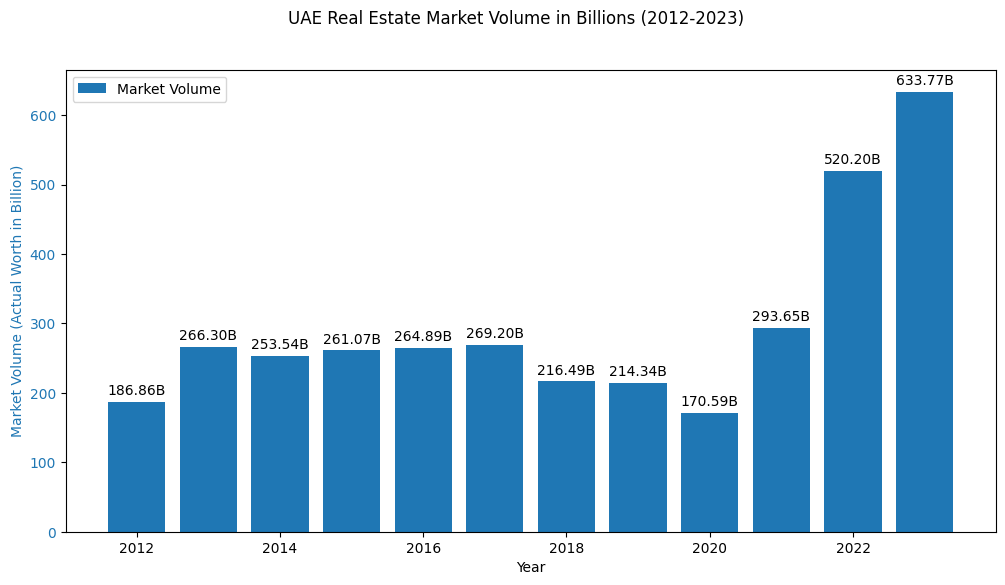

In [69]:

df_yearly_sum['Actual_Worth_Billion'] = df_yearly_sum['actual_worth'] / 1e9  # Convert to billions

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Actual Worth as Bar Chart
color = 'tab:blue'
ax1.set_xlabel('Year')
# ax1.set_xticklabels(df_yearly_sum['instance_date'])
ax1.set_ylabel('Market Volume (Actual Worth in Billion)', color=color)
bars = ax1.bar(df_yearly_sum['instance_date'], df_yearly_sum['Actual_Worth_Billion'], color=color, alpha=1, label='Market Volume')
ax1.tick_params(axis='y', labelcolor=color)

# Annotate bars with Actual Worth values
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}B',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

    
# # Add titles and legends
fig.suptitle('UAE Real Estate Market Volume in Billions (2012-2023)')
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # Show plot
plt.show()

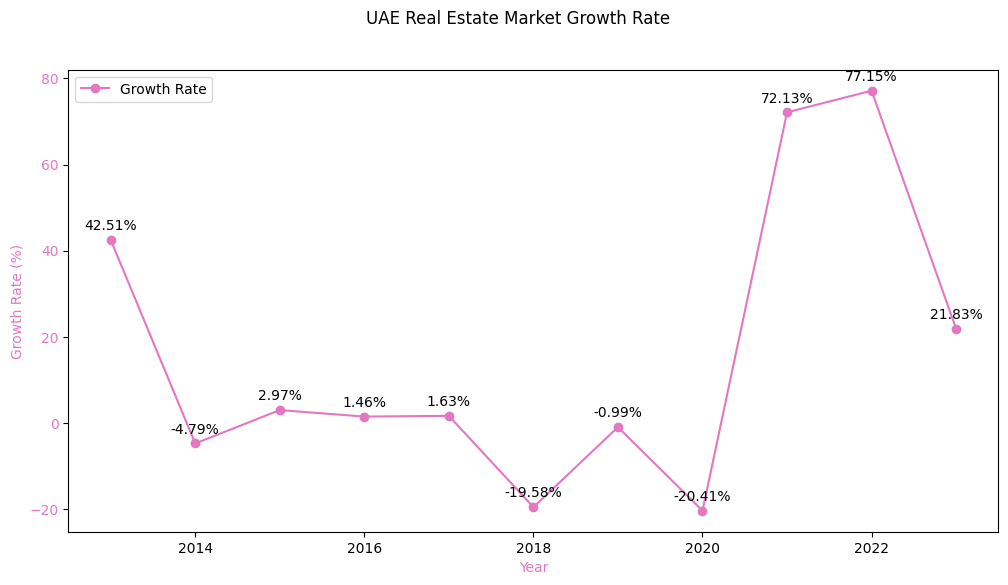

In [70]:
df_yearly_sum['Actual_Worth_Billion'] = df_yearly_sum['actual_worth'] / 1e9  # Convert to billions

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1
color = 'tab:pink'
ax2.set_ylabel('Growth Rate (%)', color=color)
ax2.set_xlabel('Year', color=color)
line = ax2.plot(df_yearly_sum['instance_date'], df_yearly_sum['Growth_Rate'], color=color, marker='o', label='Growth Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate line with Growth Rate values
for x, y in zip(df_yearly_sum['instance_date'], df_yearly_sum['Growth_Rate']):
    ax2.annotate(f'{y:.2f}%',
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

# Important Figure
    
# # Add titles and legends
fig.suptitle('UAE Real Estate Market Growth Rate')
ax2.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # Show plot
plt.show()

In [76]:
# Convert 'instance_date' to datetime format

df['instance_date'] = pd.to_datetime(df['instance_date'])

# Extract year from 'instance_date'
df['year'] = df['instance_date'].dt.year

# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum2 = df.groupby(['year', 'property_usage_en'])['actual_worth'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table1 = df_yearly_sum2.pivot(index='year', columns='property_usage_en', values='actual_worth')

pivot_table1 = pivot_table1.reset_index()
pivot_table1 = pivot_table1.drop(columns = ['Residential / Commercial'])
# pivot_table1['actual_worth'] = df_yearly_sum['actual_worth']
pivot_table1

property_usage_en,year,Agricultural,Commercial,Hospitality,Industrial,Multi-Use,Other,Residential,Storage
0,2012,4.526142e+08,8.343445e+10,2.416291e+09,1.293200e+09,1.380434e+09,2.060837e+10,7.724450e+10,7251465.0
1,2013,6.932393e+08,1.246630e+11,8.374688e+09,2.455631e+09,1.098616e+09,8.986659e+09,1.199266e+11,98975107.0
2,2014,6.924681e+08,9.930736e+10,7.399922e+09,4.779734e+09,2.738780e+09,1.415638e+10,1.241717e+11,232124863.0
3,2015,6.617405e+08,1.140711e+11,3.952331e+09,4.381529e+09,1.993984e+09,1.814546e+10,1.176062e+11,98358149.0
4,2016,6.797460e+08,1.160385e+11,3.826304e+09,7.786490e+09,3.611764e+09,2.520918e+10,1.075999e+11,117297033.0
5,2017,1.100119e+09,9.726323e+10,5.909154e+09,9.891001e+09,7.406065e+09,3.042872e+10,1.170130e+11,186982750.0
6,2018,1.020970e+09,8.160257e+10,5.612487e+09,5.057218e+09,1.037692e+10,1.557677e+10,9.706880e+10,171965000.0
7,2019,2.900236e+08,7.153100e+10,5.051677e+09,5.402888e+09,5.055376e+09,2.182771e+10,1.050777e+11,101305116.0
8,2020,5.994350e+08,5.955588e+10,5.670845e+09,4.409836e+09,2.928757e+09,1.389261e+10,8.347534e+10,62191823.0
9,2021,5.989417e+08,8.701144e+10,8.424432e+09,7.451585e+09,3.648514e+09,2.099767e+10,1.653173e+11,202574352.0


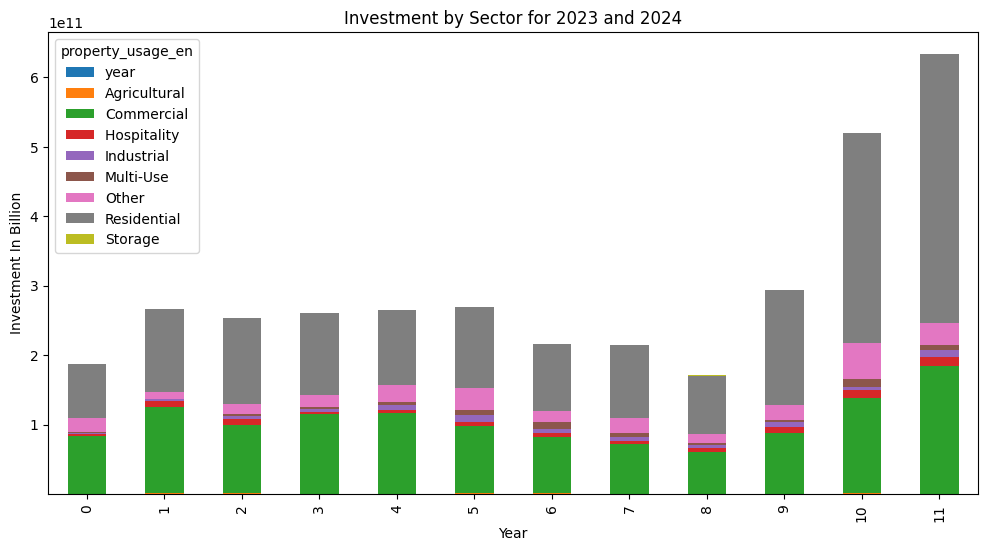

In [77]:

# Set the year as the index
# pivot_table1.set_index('year', inplace=True)

# Plot stacked bar graph
pivot_table1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Investment by Sector for 2023 and 2024')
plt.xlabel('Year')
plt.ylabel('Investment In Billion')
# plt.ylabel('Investment Valuedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA9wAAAI4CAYAAACY8uE9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAACEfElEQVR4nOzdeXiM1///8ddkj6xF7JEEEbHvitqK2lu0lpYPsbVVald8fOxb1a5qKSWqti50sbWkdrWLaqmtIbS2liSNJSS5f3/4mp+RIBMZk+jzcV1zXbnPOfe533MM8p5z7nObDMMwBAAAAAAAMpSDvQMAAAAAAOBZRMINAAAAAIANkHADAAAAAGADJNwAAAAAANgACTcAAAAAADZAwg0AAAAAgA2QcAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANkDCDQD41zCZTOrZs6e9w3imLFmyRMWKFZOzs7N8fX3tHQ4khYeHy2Qy6cyZM/YOBQD+9Ui4AcCG7v3iu3//fnuHkiZ//vmnRo4cqcjISHuHkibLli3T9OnT7R1GCmfOnFGnTp1UuHBhubm5KU+ePKpZs6ZGjBhhs2vu2rVLI0eOVExMjM2u8aDffvtNYWFhKly4sObPn6+PP/7YpteLiIhQ586dVbRoUWXLlk2FChVS165ddeHChVTb79q1Sy+88IKyZcumPHnyqFevXoqPj7dos2/fPvXs2VMlSpSQh4eHChYsqNatW+vEiRMp+ps/f75q1aql3Llzy9XVVUFBQerUqVOWTWztPZ73u3PnjooXLy6TyaTJkydn2HsEAHtzsncAAIDM488//9SoUaMUGBiosmXL2jucx1q2bJl++eUX9enTx96hmJ06dUqVKlWSu7u7OnfurMDAQF24cEEHDx7UxIkTNWrUKJtcd9euXRo1apTCwsKe2kzzli1blJycrBkzZqhIkSI2v96gQYN09epVtWrVSsHBwfr99981a9YsrVmzRpGRkcqTJ4+5bWRkpOrWravQ0FBNnTpV58+f1+TJk3Xy5EmtX7/e3G7ixInauXOnWrVqpdKlS+vixYuaNWuWypcvr927d6tkyZLmtocOHVJQUJBefvllPffcc4qKitL8+fO1Zs0aHT58WPny5bP5GGQke4/n/T788ENFR0fb/D0DwFNnAABsZtGiRYYkY9++ffYOJU327dtnSDIWLVpk71DSpEmTJkZAQECa20syevToYbuADMN45513DCcnJ+PMmTMp6i5dumSz606aNMmQZERFRWVYn8nJycaNGzceWj9q1ChDknHlypUMu+b169cfWrd161YjKSkpRZkkY+jQoRbljRo1MvLmzWvExsaay+bPn29IMr7//ntz2c6dO42EhASLc0+cOGG4uroa7dq1e2y8+/fvNyQZEyZMeGzbp+XevzuP+yxklvG8dOmS4ePjY4wePdqQZEyaNCktbxMAsgSWlAPAUxYWFiZPT0/98ccfat68uTw9PeXn56cBAwYoKSlJ0t3lldmzZ1enTp1SnB8XFyc3NzcNGDDAXJaQkKARI0aoSJEicnV1lb+/v9577z0lJCRYnLtx40a98MIL8vX1laenp0JCQvTf//5X0t3ZykqVKkmSOnXqJJPJJJPJpPDwcElS7dq1VbJkSf3888+qVauWsmXLpiJFiujLL7+UJG3dulVVqlSRu7u7QkJCtGnTphSx//HHH+rcubN5SW6JEiW0cOFCizZbtmyRyWTS559/rnHjxqlAgQJyc3NT3bp1derUKXO72rVra+3atTp79qw51sDAwDT9GSxdulQhISFyc3NThQoVtG3bNnPd5s2bZTKZtHr16hTnLVu2TCaTST/99NND+z59+rQKFCiggICAFHW5cuVKUbZ+/XrVqFFDHh4e8vLyUpMmTfTrr7+maPfbb7+pdevW8vPzM4/x0KFDJUkjR47UwIEDJUlBQUHm8bi31DkxMVFjxoxR4cKF5erqqsDAQP33v/9N8fkIDAxU06ZN9f3336tixYpyd3fXvHnzUn2fgYGB5iXyfn5+MplMGjlypLl+9uzZKlGihFxdXZUvXz716NEjxXL3e5+pAwcOqGbNmsqWLZv585iamjVrysHBIUVZ9uzZdezYMXNZXFycNm7cqPbt28vb29tc3qFDB3l6eurzzz83l1WrVk0uLi4WfQYHB6tEiRIWfT7Mvc9cWpbyL1q0SC+++KJy5colV1dXFS9eXHPmzEm1z6ZNm2rHjh2qXLmy3NzcVKhQIX366acp2v7666968cUX5e7urgIFCmjs2LFKTk5+bCxS5hnPwYMHKyQkRO3bt09T3ACQlbCkHADsICkpSQ0aNFCVKlU0efJkbdq0SVOmTFHhwoXVvXt3OTs7q0WLFlq1apXmzZtn8Qvs119/rYSEBLVt21aSlJycrJdfflk7duzQm2++qdDQUB05ckTTpk3TiRMn9PXXX0u6+4t506ZNVbp0aY0ePVqurq46deqUdu7cKUkKDQ3V6NGjNXz4cL355puqUaOGpLu/QN9z7do1NW3aVG3btlWrVq00Z84ctW3bVkuXLlWfPn309ttv64033tCkSZP02muv6dy5c/Ly8pIkXbp0Sc8//7x54zI/Pz+tX79eXbp0UVxcXIpl4e+//74cHBw0YMAAxcbG6oMPPlC7du20Z88eSdLQoUMVGxur8+fPa9q0aZIkT0/Px4791q1btXLlSvXq1Uuurq6aPXu2GjZsqL1796pkyZKqXbu2/P39tXTpUrVo0cLi3KVLl6pw4cKqWrXqQ/sPCAjQpk2b9OOPP+rFF198ZCxLlixRx44d1aBBA02cOFE3btzQnDlz9MILL+jQoUPmZO7nn39WjRo15OzsrDfffFOBgYE6ffq0vvvuO40bN04tW7bUiRMntHz5ck2bNk05c+aUdDcRlqSuXbtq8eLFeu2119S/f3/t2bNHEyZM0LFjx1J8sXD8+HG9/vrreuutt9StWzeFhISkGvv06dP16aefavXq1ZozZ448PT1VunRpSXe/ABg1apTq1aun7t276/jx45ozZ4727dunnTt3ytnZ2dzP33//rUaNGqlt27Zq3769cufO/cgxe1B8fLzi4+PN71mSjhw5osTERFWsWNGirYuLi8qWLatDhw49sk/DMHTp0iWVKFEi1fq///5bSUlJio6O1ujRoyVJdevWfWysc+bMUYkSJfTyyy/LyclJ3333nd555x0lJyerR48eFm1PnTql1157TV26dFHHjh21cOFChYWFqUKFCua4Ll68qDp16igxMVGDBw+Wh4eHPv74Y7m7uz82lod52uO5d+9eLV68WDt27JDJZEp33ACQadl7ih0AnmWpLSnv2LGjIckYPXq0Rdty5coZFSpUMB9///33hiTju+++s2jXuHFjo1ChQubjJUuWGA4ODsb27dst2s2dO9eQZOzcudMwDMOYNm3aY5f/PmpJea1atQxJxrJly8xlv/32myHJcHBwMHbv3p0i9vv76dKli5E3b17jr7/+sui3bdu2ho+Pj3np8ubNmw1JRmhoqMXS1BkzZhiSjCNHjpjL0rOkXJKxf/9+c9nZs2cNNzc3o0WLFuayIUOGGK6urkZMTIy57PLly4aTk5MxYsSIR17jl19+Mdzd3Q1JRtmyZY3evXsbX3/9dYql0v/884/h6+trdOvWzaL84sWLho+Pj0V5zZo1DS8vL+Ps2bMWbZOTk80/P2xJeWRkpCHJ6Nq1q0X5gAEDDEnGjz/+aC4LCAgwJBkbNmx45Hu8Z8SIESk+U5cvXzZcXFyMl156yWK58qxZswxJxsKFC81l9z5Tc+fOTdP1UjNmzBhDkhEREWEu++KLLwxJxrZt21K0b9WqlZEnT55H9rlkyRJDkvHJJ5+kWu/q6mr+LOXIkcOYOXNmmmJNbXl+gwYNLP4+G8b//3O4P/7Lly8brq6uRv/+/c1lffr0MSQZe/bssWjn4+OT7tsLnuZ4JicnG5UrVzZef/11wzAMIyoqiiXlAJ45LCkHADt5++23LY5r1Kih33//3Xz84osvKmfOnFq5cqW57Nq1a9q4caPatGljLvviiy8UGhqqYsWK6a+//jK/7s2ubt68WZLMG2l98803aV5y+iBPT0/zzLokhYSEyNfXV6GhoapSpYq5/N7P996PYRj66quv1KxZMxmGYRFngwYNFBsbq4MHD1pcq1OnThYz+/dm3O8fo/SoWrWqKlSoYD4uWLCgXnnlFX3//ffmJf0dOnRQQkKCebm8JK1cuVKJiYmPXfZaokQJRUZGqn379jpz5oxmzJih5s2bK3fu3Jo/f7653caNGxUTE6PXX3/dYjwcHR1VpUoV85/blStXtG3bNnXu3FkFCxa0uFZaZgTXrVsnSerXr59Fef/+/SVJa9eutSgPCgpSgwYNHtvvw2zatEm3b99Wnz59LJYrd+vWTd7e3imu5+rqmuqtE2mxbds2jRo1Sq1bt7ZYTXDz5k1z3w9yc3Mz16fmt99+U48ePVS1alV17Ngx1Tbr16/XunXrNGXKFBUsWFDXr19PU7z3zzzHxsbqr7/+Uq1atfT7778rNjbWom3x4sXNn3np7mqFkJAQi8//unXr9Pzzz6ty5coW7dq1a5emeB70tMczPDxcR44c0cSJE9MVLwBkBc9Mwr1t2zY1a9ZM+fLlk8lkMi+hTKtbt24pLCxMpUqVkpOTk5o3b56izYULF/TGG2+oaNGicnBwyFS74gLIWtzc3MzLfe957rnndO3aNfOxk5OTXn31VX3zzTfme21XrVqlO3fuWCTcJ0+e1K+//io/Pz+LV9GiRSVJly9fliS1adNG1atXV9euXZU7d261bdtWn3/+uVXJd4ECBVIkeT4+PvL3909RJsn8fq5cuaKYmBh9/PHHKeK8l2zdi/OeB5PL5557zqLP9AoODk5RVrRoUd24cUNXrlyRJBUrVkyVKlXS0qVLzW2WLl2q559/Pk27cRctWlRLlizRX3/9pZ9//lnjx4+Xk5OT3nzzTfO97SdPnpR094uVB8fkhx9+MI/HvQTrYbs7P87Zs2fl4OCQIu48efLI19dXZ8+etSgPCgpK13Xuv56kFEvRXVxcVKhQoRTXy58/f4p7ftPit99+U4sWLVSyZEktWLDAou5eYvvgPerS3f/vH7bk+uLFi2rSpIl8fHz05ZdfytHRMdV2derUUaNGjdSvXz998cUXGjVqlGbNmvXYmHfu3Kl69erJw8NDvr6+8vPzM9+z/mDC/eDnX0r5b8TZs2dT/Tw/7DaAR3na4xkXF6chQ4Zo4MCBKf79AIBnyTNzD/f169dVpkwZde7cWS1btrT6/KSkJLm7u6tXr1766quvUm2TkJAgPz8//e9//zPfLwgA6fGwX+Qf1LZtW82bN0/r169X8+bN9fnnn6tYsWIqU6aMuU1ycrJKlSqlqVOnptrHvV9m3d3dtW3bNm3evFlr167Vhg0btHLlSr344ov64Ycf0hTTw9o8rNwwDHOMktS+ffuHzhreu/83rX3aWocOHdS7d2+dP39eCQkJ2r17d5qSqvs5OjqqVKlSKlWqlKpWrao6depo6dKlqlevnnlMlixZYvH4pXucnDL2v+i03h/7JPf/pkd6rnfu3Dm99NJL8vHx0bp168z7BNyTN29eSUr1edIXLlxI9fFdsbGxatSokWJiYrR9+/Y0P+KrcOHCKleunJYuXaqePXs+tN3p06dVt25dFStWTFOnTpW/v79cXFy0bt06TZs2LcUXX0/z82+P8Zw8ebJu376tNm3amDf3O3/+vKS7X6qdOXNG+fLlS9eXMQCQmTwzCXejRo3UqFGjh9YnJCRo6NChWr58uWJiYlSyZElNnDhRtWvXliR5eHiYdwrduXNnqruNBgYGasaMGZKUYlddALCFmjVrKm/evFq5cqVeeOEF/fjjj+adqe8pXLiwDh8+rLp16z42qXJwcFDdunVVt25dTZ06VePHj9fQoUO1efNm1atXz2abFvn5+cnLy0tJSUmqV69ehvWbnnjvzSzf78SJE8qWLZvFqoO2bduqX79+Wr58uW7evClnZ2eLlQXWurfh1L2kpXDhwpLu7lz+qDEpVKiQJOmXX355ZP8PG4uAgAAlJyfr5MmTCg0NNZdfunRJMTExqe6m/iTu9Xf8+HFz7JJ0+/ZtRUVFPfGf/99//62XXnpJCQkJioiIMCeD9ytZsqScnJy0f/9+tW7d2iKGyMhIizLp7ixts2bNdOLECW3atEnFixe3KqabN2+mOvt7v++++04JCQn69ttvLWav7906kB4BAQGpfp6PHz+e5j7sNZ7R0dG6du1aqhupjR8/XuPHj9ehQ4dUtmzZNL8XAMiMnpkl5Y/Ts2dP/fTTT1qxYoV+/vlntWrVSg0bNkz1PyoAyCwcHBz02muv6bvvvtOSJUuUmJiYIulr3bq1/vjjD4v7g++5efOm+f7Sq1evpqi/98vsvWTBw8NDUtoecWQNR0dHvfrqq/rqq69STRzvLeW2loeHR4qluI/z008/Wdwvfu7cOX3zzTd66aWXLGYVc+bMqUaNGumzzz7T0qVL1bBhQ4udmx9m+/btunPnTorye/dS31vu26BBA3l7e2v8+PGptr83Jn5+fqpZs6YWLlyo6Ohoizb3z3Y+7M+ucePGku7uKn6/eysimjRp8tj3ZI169erJxcVFM2fOtIjvk08+UWxs7BNd7/r162rcuLH++OMPrVu3LtXl1NLdWxrq1aunzz77TP/884+5fMmSJYqPj1erVq3MZUlJSWrTpo1++uknffHFFw/dgT4xMTHV2xn27t2rI0eOpNjB+0H3Plv3j0lsbKwWLVr0yPMepXHjxtq9e7f27t1rLrty5YrFrRCPYs/x7NWrl1avXm3xuvcIurCwMK1evfqJb28AgMzgmZnhfpTo6GgtWrRI0dHR5iVNAwYM0IYNG7Ro0SKNHz/ezhECwMO1adNGH374oUaMGKFSpUpZzFJK0n/+8x99/vnnevvtt7V582ZVr15dSUlJ+u233/T555+bn6k8evRobdu2TU2aNFFAQIAuX76s2bNnq0CBAnrhhRck3Z119fX11dy5c+Xl5SUPDw9VqVIlQ37xff/997V582ZVqVJF3bp1U/HixXX16lUdPHhQmzZtSvULgcepUKGCVq5cqX79+qlSpUry9PRUs2bNHnlOyZIl1aBBA4vHgknSqFGjUrTt0KGDXnvtNUnSmDFj0hTTxIkTdeDAAbVs2dK8TP7gwYP69NNPlT17dvP+H97e3pozZ47+85//qHz58mrbtq38/PwUHR2ttWvXqnr16uYl7DNnztQLL7yg8uXL680331RQUJDOnDmjtWvXKjIy0jwW0t3HpbVt21bOzs5q1qyZypQpo44dO+rjjz9WTEyMatWqZX4UU/PmzVWnTp00va+08vPz05AhQzRq1Cg1bNhQL7/8so4fP67Zs2erUqVKT/Ss5Xbt2mnv3r3q3Lmzjh07ZvFcZ09PT4v9V8aNG6dq1aqpVq1aevPNN3X+/HlNmTJFL730kho2bGhu179/f3377bdq1qyZrl69qs8++8zimvfijY+Pl7+/v9q0aaMSJUrIw8NDR44c0aJFi+Tj46Nhw4Y9MvaXXnpJLi4uatasmd566y3Fx8dr/vz5ypUrV6pLtdPivffe05IlS9SwYUP17t3b/FiwgIAA/fzzz489357jWb58eZUvX96i7t7S8hIlSqS6lw4AZEn22yDddiQZq1evNh+vWbPGkGR4eHhYvJycnIzWrVunOL9jx47GK6+88shr1KpVy+jdu3fGBg7gmfOwx4J5eHikaHvvEUsPSk5ONvz9/Q1JxtixY1O9zu3bt42JEycaJUqUMFxdXY3nnnvOqFChgjFq1CgjNjbWMAzDiIiIMF555RUjX758houLi5EvXz7j9ddfN06cOGHR1zfffGMUL17ccHJysni0V61atYwSJUqkuHZAQIDRpEmTFOWSjB49eliUXbp0yejRo4fh7+9vODs7G3ny5DHq1q1rfPzxx+Y29x4L9sUXX1ice++RQfc/aiw+Pt544403DF9fX0PSYx8Rdi+mzz77zAgODjZcXV2NcuXKGZs3b061fUJCgvHcc88ZPj4+xs2bNx/Z9z07d+40evToYZQsWdLw8fExnJ2djYIFCxphYWHG6dOnU7TfvHmz0aBBA8PHx8dwc3MzChcubISFhVk8usww7j5urEWLFoavr6/h5uZmhISEGMOGDbNoM2bMGCN//vyGg4ODxWOh7ty5Y4waNcoICgoynJ2dDX9/f2PIkCHGrVu3LM5/2J/lw6T2WLB7Zs2aZRQrVsxwdnY2cufObXTv3t24du2aRZuHfaYe5t7jslJ7pfZnv337dqNatWqGm5ub4efnZ/To0cOIi4tLEcPD+rz/72NCQoLRu3dvo3Tp0oa3t7fh7OxsBAQEGF26dEnz47e+/fZbo3Tp0oabm5sRGBhoTJw40Vi4cGGKR3g97M+hVq1aRq1atSzKfv75Z6NWrVqGm5ubkT9/fmPMmDHGJ598kqbHgtlzPFPDY8EAPItMhvGUdp95ikwmk1avXm3+dnTlypVq166dfv311xSbkHh6eqbYrCYsLEwxMTGP3Om8du3aKlu2bIolegCAZ0diYqLy5cunZs2a6ZNPPrF3OAAAIIv5VywpL1eunJKSknT58mWLZ1oCAPAoX3/9ta5cuaIOHTrYOxQAAJAFPTMJd3x8vE6dOmU+joqKUmRkpLJnz66iRYuqXbt26tChg6ZMmaJy5crpypUrioiIUOnSpc0buBw9elS3b9/W1atX9c8//5jvi7t/h8x7ZfHx8bpy5YoiIyPl4uJi9Y6mAIDMa8+ePfr55581ZswYlStXTrVq1bJ3SAAAIAt6ZpaUb9myJdWNXzp27Kjw8HDduXNHY8eO1aeffqo//vhDOXPm1PPPP69Ro0apVKlSku4+9uvs2bMp+rh/iFJ77EpAQIB5ow8AQNYXFhamzz77TGXLllV4eLhKlixp75AAAEAW9Mwk3AAAAAAAZCb/mudwAwAAAADwNGXpe7iTk5P1559/ysvLK9Wl3gAAAAAAZCTDMPTPP/8oX758cnB49Bx2lk64//zzT/n7+9s7DAAAAADAv8y5c+dUoECBR7bJ0gm3l5eXpLtv1Nvb287RAAAAAACedXFxcfL39zfno4+SpRPue8vIvb29SbgBAAAAAE9NWm5rZtM0AAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGsvQ93GmVlJSkO3fu2DsMZBHOzs5ydHS0dxgAAAAAsrhnOuE2DEMXL15UTEyMvUNBFuPr66s8efLwfHcAAAAA6fZMJ9z3ku1cuXIpW7ZsJE94LMMwdOPGDV2+fFmSlDdvXjtHBAAAACCremYT7qSkJHOynSNHDnuHgyzE3d1dknT58mXlypWL5eUAAAAA0uWZ3TTt3j3b2bJls3MkyIrufW649x8AAABAej2zCfc9LCNHevC5AQAAAPCknvmEGwAAAAAAeyDhBgAAAADABki4AQAAAACwARLuLKR27drq06ePvcMAAAAAAKQBCXca3b59+195bQAAAABA+vxrE+7atWurZ8+e6tmzp3x8fJQzZ04NGzZMhmFIkgIDAzVmzBh16NBB3t7eevPNNyVJX331lUqUKCFXV1cFBgZqypQpFv3eO+/111+Xh4eH8ufPr48++siiTUxMjLp27So/Pz95e3vrxRdf1OHDh831I0eOVNmyZbVgwQIFBQXJzc1NYWFh2rp1q2bMmCGTySSTyaSoqCgVKVJEkydPtug/MjJSJpNJp06deuQYnDlzRiaTSZGRkRaxmUwmbdmyRZJ07do1tWvXTn5+fnJ3d1dwcLAWLVpkbj9o0CAVLVpU2bJlU6FChTRs2LAUj9IaO3ascuXKJS8vL3Xt2lWDBw9W2bJlLdosWLBAoaGhcnNzU7FixTR79uxHxn6/c+fOqXXr1vL19VX27Nn1yiuv6MyZM+b6sLAwNW/eXJMnT1bevHmVI0cO9ejRg0d+AQAAALCpf23CLUmLFy+Wk5OT9u7dqxkzZmjq1KlasGCBuX7y5MkqU6aMDh06pGHDhunAgQNq3bq12rZtqyNHjmjkyJEaNmyYwsPDLfqdNGmS+bzBgwerd+/e2rhxo7m+VatWunz5stavX68DBw6ofPnyqlu3rq5evWpuc+rUKX311VdatWqVIiMjNWPGDFWtWlXdunXThQsXdOHCBRUsWFCdO3e2SIAladGiRapZs6aKFCnyxGM0bNgwHT16VOvXr9exY8c0Z84c5cyZ01zv5eWl8PBwHT16VDNmzND8+fM1bdo0c/3SpUs1btw4TZw4UQcOHFDBggU1Z84ci2ssXbpUw4cP17hx43Ts2DGNHz9ew4YN0+LFix8b3507d9SgQQN5eXlp+/bt2rlzpzw9PdWwYUOLlQGbN2/W6dOntXnzZi1evFjh4eEp/twAAAAAIEMZWVhsbKwhyYiNjU1Rd/PmTePo0aPGzZs3Uz23Vq1aRmhoqJGcnGwuGzRokBEaGmoYhmEEBAQYzZs3tzjnjTfeMOrXr29RNnDgQKN48eLm44CAAKNhw4YWbdq0aWM0atTIMAzD2L59u+Ht7W3cunXLok3hwoWNefPmGYZhGCNGjDCcnZ2Ny5cvp4i5d+/eFmV//PGH4ejoaOzZs8cwDMO4ffu2kTNnTiM8PDzV932/qKgoQ5Jx6NAhc9m1a9cMScbmzZsNwzCMZs2aGZ06dXpsX/dMmjTJqFChgvm4SpUqRo8ePSzaVK9e3ShTpoz5uHDhwsayZcss2owZM8aoWrXqY6+3ZMkSIyQkxOLPMSEhwXB3dze+//57wzAMo2PHjkZAQICRmJhobtOqVSujTZs2D+33cZ8fAAAAAP9Oj8pDH/SvnuF+/vnnZTKZzMdVq1bVyZMnlZSUJEmqWLGiRftjx46pevXqFmXVq1e3OOdeP/erWrWqjh07Jkk6fPiw4uPjlSNHDnl6eppfUVFROn36tPmcgIAA+fn5PfY95MuXT02aNNHChQslSd99950SEhLUqlWrtAzBY3Xv3l0rVqxQ2bJl9d5772nXrl0W9StXrlT16tWVJ08eeXp66n//+5+io6PN9cePH1flypUtzrn/+Pr16zp9+rS6dOliMR5jx461GI+HOXz4sE6dOiUvLy/zudmzZ9etW7cszi9RooQcHR3Nx3nz5tXly5etHg8AAAAASCsneweQmXl4eGR4n/Hx8cqbN6/5Hun7+fr6puvaXbt21X/+8x9NmzZNixYtUps2bZQtW7bHnufgcPf7FuP/7luXlOK+5kaNGuns2bNat26dNm7cqLp166pHjx6aPHmyfvrpJ7Vr106jRo1SgwYN5OPjoxUrVqS4r/1R4uPjJUnz589XlSpVLOruT5AfdX6FChW0dOnSFHX3f2Hh7OxsUWcymZScnJzmOAEAAADAWv/qhHvPnj0Wx7t371ZwcPBDE73Q0FDt3LnTomznzp0qWrSoxTm7d+9O0W9oaKgkqXz58rp48aKcnJwUGBhoVbwuLi4WM+n3NG7cWB4eHpozZ442bNigbdu2pam/ewnphQsXVK5cOUmy2EDt/nYdO3ZUx44dVaNGDQ0cOFCTJ0/Wrl27FBAQoKFDh5rbnj171uLckJAQ7du3Tx06dDCX7du3z/xz7ty5lS9fPv3+++9q165dmuK+X/ny5bVy5UrlypVL3t7eVp8PAAAAIOOMHDnS3iE8lD1i+1cn3NHR0erXr5/eeustHTx4UB9++OEjZ2f79++vSpUqacyYMWrTpo1++uknzZo1K8WO2jt37tQHH3yg5s2ba+PGjfriiy+0du1aSVK9evVUtWpVNW/eXB988IGKFi2qP//8U2vXrlWLFi1SLGO/X2BgoPbs2aMzZ86Yl047ODjI0dFRYWFhGjJkiIKDg1MsaX8Yd3d3Pf/883r//fcVFBSky5cv63//+59Fm+HDh6tChQoqUaKEEhIStGbNGvOXB8HBwYqOjtaKFStUqVIlrV27VqtXr7Y4/91331W3bt1UsWJFVatWTStXrtTPP/+sQoUKmduMGjVKvXr1ko+Pjxo2bKiEhATt379f165dU79+/R75Htq1a6dJkybplVde0ejRo1WgQAGdPXtWq1at0nvvvacCBQqkaSwAAAAAPLmut+raO4RM5V99D3eHDh108+ZNVa5cWT169FDv3r3Nj/9KTfny5fX5559rxYoVKlmypIYPH67Ro0crLCzMol3//v21f/9+lStXTmPHjtXUqVPVoEEDSXeXMq9bt041a9ZUp06dVLRoUbVt21Znz55V7ty5HxnvgAED5OjoqOLFi8vPz8/iXukuXbro9u3b6tSpk1VjsHDhQiUmJqpChQrq06ePxo4da1Hv4uKiIUOGqHTp0qpZs6YcHR21YsUKSdLLL7+svn37qmfPnipbtqx27dqlYcOGWZzfrl07DRkyRAMGDFD58uUVFRWlsLAwubm5mdt07dpVCxYs0KJFi1SqVCnVqlVL4eHhCgoKemz82bJl07Zt21SwYEG1bNlSoaGh6tKli27dusWMNwAAAAC7Mhn338CbxcTFxcnHx0exsbEpkqtbt24pKirK/BzrB9WuXVtly5bV9OnTMzSmwMBA9enTR3369MnQfh9n+/btqlu3rs6dO/fYxN3e6tevrzx58mjJkiX2DuWhHvf5AQAAAJDS+cHb7R3CQxV4v0aG9POoPPRB/+ol5c+ChIQEXblyRSNHjlSrVq0yXbJ948YNzZ07Vw0aNJCjo6OWL1+uTZs2WTyXHAAAAACeRf/qJeXPguXLlysgIEAxMTH64IMPLOqWLl1q8ait+18lSpR4KvHdv4S+QoUK+u677/TVV1+pXr16aTp//PjxD30PjRo1snH0AAAAAJB+/9ol5f8G//zzjy5dupRqnbOzswICAp5yRNa7evWqrl69mmqdu7u78ufPb5Pr8vkBAAAArMeSckssKX+GeXl5ycvLy95hPJHs2bMre/bs9g4DAAAAAKzGknIAAAAAAGyAhBsAAAAAABsg4QYAAAAAwAZIuAEAAAAAsAESbgAAAAAAbIBdyv9P4OC1T/V6Z95v8lSv9yhhYWGKiYnR119/nSH9hYeHq0+fPoqJicmQ/tIjMDBQffr0UZ8+fewWAwAAAIB/N2a4s5iffvpJjo6OatIk4xL2GTNmKDw8PMP6e9DIkSNVtmxZm/UPAAAAAJkRCXcW88knn+jdd9/Vtm3b9Oeffz5RX0lJSUpOTpaPj498fX0zJkAbMgxDiYmJ9g4DAAAAANKEhDsLiY+P18qVK9W9e3c1adIkxaz0t99+q+DgYLm5ualOnTpavHixTCaTeWl3eHi4fH199e2336p48eJydXVVdHS0wsLC1Lx5c3M/ycnJ+uCDD1SkSBG5urqqYMGCGjdunCRpy5YtFn1KUmRkpEwmk86cOZMi5vDwcI0aNUqHDx+WyWSSyWRSeHi4zpw5I5PJpMjISHPbmJgYmUwmbdmyxeJa69evV4UKFeTq6qodO3bo9OnTeuWVV5Q7d255enqqUqVK2rRpUwaMMAAAAABkHBLuLOTzzz9XsWLFFBISovbt22vhwoUyDEOSFBUVpddee03NmzfX4cOH9dZbb2no0KEp+rhx44YmTpyoBQsW6Ndff1WuXLlStBkyZIjef/99DRs2TEePHtWyZcuUO3fudMXcpk0b9e/fXyVKlNCFCxd04cIFtWnTxqo+Bg8erPfff1/Hjh1T6dKlFR8fr8aNGysiIkKHDh1Sw4YN1axZM0VHR6crRgAAAACwBTZNy0I++eQTtW/fXpLUsGFDxcbGauvWrapdu7bmzZunkJAQTZo0SZIUEhKiX375xTwzfc+dO3c0e/ZslSlTJtVr/PPPP5oxY4ZmzZqljh07SpIKFy6sF154IV0xu7u7y9PTU05OTsqTJ0+6+hg9erTq169vPs6ePbtF/GPGjNHq1av17bffqmfPnum6BgAAAABkNGa4s4jjx49r7969ev311yVJTk5OatOmjT755BNzfaVKlSzOqVy5cop+XFxcVLp06Yde59ixY0pISFDdunUzMPonU7FiRYvj+Ph4DRgwQKGhofL19ZWnp6eOHTvGDDcAAACATMXuCfcff/yh9u3bK0eOHHJ3d1epUqW0f/9+e4eV6XzyySdKTExUvnz55OTkJCcnJ82ZM0dfffWVYmNj09yPu7u7TCbTI+sfxcHh7kfm3lJ26e6subWs6cfDw8PieMCAAVq9erXGjx+v7du3KzIyUqVKldLt27etjgMAAAAAbMWuCfe1a9dUvXp1OTs7a/369Tp69KimTJmi5557zp5hZTqJiYn69NNPNWXKFEVGRppfhw8fVr58+bR8+XKFhISk+KJi3759Vl8rODhY7u7uioiISLXez89PknThwgVz2f0bn6XGxcVFSUlJT9zPPTt37lRYWJhatGihUqVKKU+ePKlu2AYAAAAA9mTXe7gnTpwof39/LVq0yFwWFBRkx4gypzVr1ujatWvq0qWLfHx8LOpeffVVffLJJ/r88881depUDRo0SF26dFFkZKR5F/NHzWg/yM3NTYMGDdJ7770nFxcXVa9eXVeuXNGvv/6qLl26qEiRIvL399fIkSM1btw4nThxQlOmTHlkn4GBgYqKilJkZKQKFCggLy8vubu76/nnn9f777+voKAgXb58Wf/73//SFGNwcLBWrVqlZs2ayWQyadiwYUpOTk7zewQAAACAp8GuCfe3336rBg0aqFWrVtq6davy58+vd955R926dUu1fUJCghISEszHcXFxGRbLmfebZFhfGe2TTz5RvXr1UiTb0t2E+4MPPtA///yjL7/8Uv3799eMGTNUtWpVDR06VN27d5erq6tV1xs2bJicnJw0fPhw/fnnn8qbN6/efvttSZKzs7OWL1+u7t27q3Tp0qpUqZLGjh2rVq1aPbS/V199VatWrVKdOnUUExOjRYsWKSwsTAsXLlSXLl1UoUIFhYSE6IMPPtBLL7302PimTp2qzp07q1q1asqZM6cGDRqUoZ8FAAAAAMgIJuP+m2ifMjc3N0lSv3791KpVK+3bt0+9e/fW3LlzzTtk32/kyJEaNWpUivLY2Fh5e3tblN26dUtRUVEKCgoyX+ffZty4cZo7d67OnTtn71CyHD4/AAAAgPXOD95u7xAeqsD7NTKkn7i4OPn4+KSahz7IrjPcycnJqlixosaPHy9JKleunH755ZeHJtxDhgxRv379zMdxcXHy9/d/avFmdrNnz1alSpWUI0cO7dy5U5MmTeIxWQAAAABgJ3ZNuPPmzavixYtblIWGhuqrr75Ktb2rq6vVy6P/TU6ePKmxY8fq6tWrKliwoPr3768hQ4bYOywAAAAA+Feya8JdvXp1HT9+3KLsxIkTCggIsFNEWdu0adM0bdo0e4cBAAAAAJCdHwvWt29f7d69W+PHj9epU6e0bNkyffzxx+rRo4c9wwIAAAAA4InZNeGuVKmSVq9ereXLl6tkyZIaM2aMpk+frnbt2tkzLAAAAAAAnphdl5RLUtOmTdW0aVN7hwEAAAAAQIay6ww3AAAAAADPKhJuAAAAAABsgIQbAAAAAAAbsPs93JnGSJ+nfL3Yp3u9Z0hgYKD69OmjPn36pKl9eHi4+vTpo5iYGJvGBQAAAAD3Y4Y7i7l48aLeffddFSpUSK6urvL391ezZs0UERFh79Cemn379unNN9+0dxgAAAAA8EjMcGchZ86cUfXq1eXr66tJkyapVKlSunPnjr7//nv16NFDv/32m71DfGJ37tyRs7PzI9v4+fk9pWgAAAAAIP2Y4c5C3nnnHZlMJu3du1evvvqqihYtqhIlSqhfv37avXu3JCk6OlqvvPKKPD095e3trdatW+vSpUvmPkaOHKmyZctq4cKFKliwoDw9PfXOO+8oKSlJH3zwgfLkyaNcuXJp3LhxFtc2mUyaN2+emjZtqmzZsik0NFQ//fSTTp06pdq1a8vDw0PVqlXT6dOnLc775ptvVL58ebm5ualQoUIaNWqUEhMTLfqdM2eOXn75ZXl4eJiv+91336lSpUpyc3NTzpw51aJFC/M5gYGBmj59uvl46tSpKlWqlDw8POTv76933nlH8fHxGTbuAAAAAJAeJNxZxNWrV7Vhwwb16NFDHh4eKep9fX2VnJysV155RVevXtXWrVu1ceNG/f7772rTpo1F29OnT2v9+vXasGGDli9frk8++URNmjTR+fPntXXrVk2cOFH/+9//tGfPHovzxowZow4dOigyMlLFihXTG2+8obfeektDhgzR/v37ZRiGevbsaW6/fft2dejQQb1799bRo0c1b948hYeHp0jmR44cqRYtWujIkSPq3Lmz1q5dqxYtWqhx48Y6dOiQIiIiVLly5YeOjYODg2bOnKlff/1Vixcv1o8//qj33nsvPcMMAAAAABmGJeVZxKlTp2QYhooVK/bQNhERETpy5IiioqLk7+8vSfr0009VokQJ7du3T5UqVZIkJScna+HChfLy8lLx4sVVp04dHT9+XOvWrZODg4NCQkI0ceJEbd68WVWqVDH336lTJ7Vu3VqSNGjQIFWtWlXDhg1TgwYNJEm9e/dWp06dzO1HjRqlwYMHq2PHjpKkQoUKacyYMXrvvfc0YsQIc7s33njD4ry2bduqbdu2GjVqlLmsTJkyD33f92+eFhgYqLFjx+rtt9/W7NmzHz6gAAAAAGBjJNxZhGEYj21z7Ngx+fv7m5NtSSpevLh8fX117Ngxc8IdGBgoLy8vc5vcuXPL0dFRDg4OFmWXL1+26L906dIW9ZJUqlQpi7Jbt24pLi5O3t7eOnz4sHbu3Gkxo52UlKRbt27pxo0bypYtmySpYsWKFteJjIxUt27dHvt+79m0aZMmTJig3377TXFxcUpMTExxDQAAAAB42ki4s4jg4GCZTKYM2RjtwU3JTCZTqmXJyckPPc9kMj207N558fHxGjVqlFq2bJkiBjc3N/PPDy6Rd3d3T/N7OXPmjJo2baru3btr3Lhxyp49u3bs2KEuXbro9u3bJNwAAAAA7IZ7uLOI7Nmzq0GDBvroo490/fr1FPUxMTEKDQ3VuXPndO7cOXP50aNHFRMTo+LFiz/NcCVJ5cuX1/Hjx1WkSJEUr/tn0x9UunTpND/m7MCBA0pOTtaUKVP0/PPPq2jRovrzzz8z6i0AAAAAQLoxw52FfPTRR6pevboqV66s0aNHq3Tp0kpMTNTGjRs1Z84cHT16VKVKlVK7du00ffp0JSYm6p133lGtWrVSLNt+GoYPH66mTZuqYMGCeu211+Tg4KDDhw/rl19+0dixYx963ogRI1S3bl0VLlxYbdu2VWJiotatW6dBgwalaFukSBHduXNHH374oZo1a6adO3dq7ty5tnxbAAAAAJAmJNz3jIy1dwSPVahQIR08eFDjxo1T//79deHCBfn5+alChQqaM2eOTCaTvvnmG7377ruqWbOmHBwc1LBhQ3344Yd2ibdBgwZas2aNRo8erYkTJ8rZ2VnFihVT165dH3le7dq19cUXX2jMmDF6//335e3trZo1a6batkyZMpo6daomTpyoIUOGqGbNmpowYYI6dOhgi7cEAAAAAGlmMtKyG1cmFRcXJx8fH8XGxsrb29ui7tatW4qKilJQUJDF/cJAWvD5AQAAAKx3fvB2e4fwUAXer5Eh/TwqD30Q93ADAAAAAGADJNwAAAAAANgACTcAAAAAADZAwg0AAAAAgA2QcAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANkDCDQAAAACADZBwAwAAAABgA072DiCzKLW41FO93pGOR57q9TJSYGCg+vTpoz59+mRoPyaTSatXr1bz5s2fOEYAAAAAsDdmuLOIsLCwVBPRLVu2yGQyKSYm5qnFsm/fPr355pvmY5PJpK+//vqJ+71w4YIaNWokSTpz5oxMJpMiIyOfuF8AAAAAsAdmuGE1Pz8/m/SbJ08em/QLAAAAAPbADPcz6KuvvlKJEiXk6uqqwMBATZkyxaJ+9uzZCg4Olpubm3Lnzq3XXnvNXFe7dm317NlTPXv2lI+Pj3LmzKlhw4bJMAxzm8DAQE2fPt38syS1aNFCJpPJfHz69Gm98soryp07tzw9PVWpUiVt2rTpkXHfP1MeFBQkSSpXrpxMJpNq166tbdu2ydnZWRcvXrQ4r0+fPqpRo4a1wwQAAAAANkXC/Yw5cOCAWrdurbZt2+rIkSMaOXKkhg0bpvDwcEnS/v371atXL40ePVrHjx/Xhg0bVLNmTYs+Fi9eLCcnJ+3du1czZszQ1KlTtWDBglSvt2/fPknSokWLdOHCBfNxfHy8GjdurIiICB06dEgNGzZUs2bNFB0dnab3sXfvXknSpk2bdOHCBa1atUo1a9ZUoUKFtGTJEnO7O3fuaOnSpercubNV4wQAAAAAtsaS8ixkzZo18vT0tChLSkqyOJ46darq1q2rYcOGSZKKFi2qo0ePatKkSQoLC1N0dLQ8PDzUtGlTeXl5KSAgQOXKlbPow9/fX9OmTZPJZFJISIiOHDmiadOmqVu3biliure83NfX12JJeJkyZVSmTBnz8ZgxY7R69Wp9++236tmz52Pf671+c+TIYdFvly5dtGjRIg0cOFCS9N133+nWrVtq3br1Y/sEAAAAgKeJGe4spE6dOoqMjLR4PTjzfOzYMVWvXt2irHr16jp58qSSkpJUv359BQQEqFChQvrPf/6jpUuX6saNGxbtn3/+eZlMJvNx1apVzeenVXx8vAYMGKDQ0FD5+vrK09NTx44dS/MM98OEhYXp1KlT2r17tyQpPDxcrVu3loeHxxP1CwAAAAAZjRnuLMTDw0NFihSxKDt//rxVfXh5eengwYPasmWLfvjhBw0fPlwjR47Uvn375Ovrm2GxDhgwQBs3btTkyZNVpEgRubu767XXXtPt27efqN9cuXKpWbNmWrRokYKCgrR+/Xpt2bIlY4IGAAAAgAxEwv2MCQ0N1c6dOy3Kdu7cqaJFi8rR0VGS5OTkpHr16qlevXoaMWKEfH199eOPP6ply5aSpD179licv3v3bgUHB5vPf5Czs3OK2e+dO3cqLCxMLVq0kHR3xvvMmTNpfh8uLi6SUi6Zl6SuXbvq9ddfV4ECBVS4cOEUM/oAAAAAkBmwpPwZ079/f0VERGjMmDE6ceKEFi9erFmzZmnAgAGS7t4HPnPmTEVGRurs2bP69NNPlZycrJCQEHMf0dHR6tevn44fP67ly5frww8/VO/evR96zcDAQEVEROjixYu6du2aJCk4OFirVq1SZGSkDh8+rDfeeEPJyclpfh+5cuWSu7u7NmzYoEuXLik2NtZc16BBA3l7e2vs2LHq1KmTtUMEAAAAAE8FM9z/50jHI/YOIUOUL19en3/+uYYPH64xY8Yob968Gj16tMLCwiTd3dxs1apVGjlypG7duqXg4GAtX75cJUqUMPfRoUMH3bx5U5UrV5ajo6N69+6tN99886HXnDJlivr166f58+crf/78OnPmjKZOnarOnTurWrVqypkzpwYNGqS4uLg0vw8nJyfNnDlTo0eP1vDhw1WjRg3z0nEHBweFhYVp/Pjx6tChQ7rGCQAAAABszWTc/4DlLCYuLk4+Pj6KjY2Vt7e3Rd2tW7cUFRWloKAgubm52SnCrKd27doqW7as+TnbmVWXLl105coVffvttzbpn88PAAAAYL3zg7fbO4SHKvB+jQzp51F56IOY4UaWEhsbqyNHjmjZsmU2S7YBAAAAICOQcCNLeeWVV7R37169/fbbql+/vr3DAQAAAICHIuGGhcz+iK3MHh8AAAAA3MMu5QAAAAAA2AAJNwAAAAAANkDCDQAAAACADZBwAwAAAABgAyTcAAAAAADYAAk3AAAAAAA2wGPB/s+xYqFP9Xqhvx17qteTJJPJpNWrV6t58+aZ/tojR47U119/rcjISJvGBQAAAAC2wgx3FhEWFmaXRPlhtmzZIpPJpJiYmDS1v3Dhgho1amTboAAAAAAgE2GGGzZ1+/Ztubi4KE+ePPYOBQAAAACeKhLuLKh27doqXbq03NzctGDBArm4uOjtt9/WyJEjzW1OnjypLl26aO/evSpUqJBmzJhh0ceWLVtUp04dXbt2Tb6+vpKkyMhIlStXTlFRUQoMDNTZs2fVs2dP7dixQ7dv31ZgYKAmTZqk4sWLq06dOpKk5557TpLUsWNHhYeHq3bt2ipZsqScnJz02WefqVSpUtq8eXOKJeWDBg3S6tWrdf78eeXJk0ft2rXT8OHD5ezsbPPxAwAAANLi/ODt9g4hVQXer2HvEJBGJNxZ1OLFi9WvXz/t2bNHP/30k8LCwlS9enXVr19fycnJatmypXLnzq09e/YoNjZWffr0sfoaPXr00O3bt7Vt2zZ5eHjo6NGj8vT0lL+/v7766iu9+uqrOn78uLy9veXu7m4RW/fu3bVz586H9u3l5aXw8HDly5dPR44cUbdu3eTl5aX33nsvPcMBAAAAAJkOCXcWVbp0aY0YMUKSFBwcrFmzZikiIkL169fXpk2b9Ntvv+n7779Xvnz5JEnjx4+3+h7q6OhovfrqqypVqpQkqVChQua67NmzS5Jy5cplniG/Jzg4WB988MEj+/7f//5n/jkwMFADBgzQihUrSLgBAAAAPDNIuLOo0qVLWxznzZtXly9fliQdO3ZM/v7+5mRbkqpWrWr1NXr16qXu3bvrhx9+UL169fTqq6+muG5qKlSo8Ng2K1eu1MyZM3X69GnFx8crMTFR3t7eVscIAAAAAJkVu5RnUQ/e62wymZScnJzm8x0c7v7RG4ZhLrtz545Fm65du+r333/Xf/7zHx05ckQVK1bUhx9++Ni+PTw8Hln/008/qV27dmrcuLHWrFmjQ4cOaejQobp9+3aa4wcAAACAzI6E+xkUGhqqc+fO6cKFC+ay3bt3W7Tx8/OTJIs2qT3z2t/fX2+//bZWrVql/v37a/78+ZIkFxcXSVJSUpLV8e3atUsBAQEaOnSoKlasqODgYJ09e9bqfgAAAAAgMyPhfgbVq1dPRYsWVceOHXX48GFt375dQ4cOtWhTpEgR+fv7a+TIkTp58qTWrl2rKVOmWLTp06ePvv/+e0VFRengwYPavHmzQkNDJUkBAQEymUxas2aNrly5ovj4+DTHFxwcrOjoaK1YsUKnT5/WzJkztXr16id/4wAAAACQiXAP9/8J/e2YvUPIMA4ODlq9erW6dOmiypUrKzAwUDNnzlTDhg3NbZydnbV8+XJ1795dpUuXVqVKlTR27Fi1atXK3CYpKUk9evTQ+fPn5e3trYYNG2ratGmSpPz582vUqFEaPHiwOnXqpA4dOig8PDxN8b388svq27evevbsqYSEBDVp0kTDhg2zeKwZAAAAAGR1JuP+m3izmLi4OPn4+Cg2NjbFhlu3bt1SVFSUgoKC5ObmZqcIkVXx+QEAAADP4bZeZh0zKePG7VF56INYUg4AAAAAgA2QcAMAAAAAYAN2TbhHjhwpk8lk8SpWrJg9QwIAAAAAIEPYfdO0EiVKaNOmTeZjJye7hwQAAAAAwBOze3br5OSkPHnypKltQkKCEhISzMdxcXG2CgsAAAAAgCdi93u4T548qXz58qlQoUJq166doqOjH9p2woQJ8vHxMb/8/f2fYqQAAAAAAKSdXRPuKlWqKDw8XBs2bNCcOXMUFRWlGjVq6J9//km1/ZAhQxQbG2t+nTt37ilHDAAAAABA2th1SXmjRo3MP5cuXVpVqlRRQECAPv/8c3Xp0iVFe1dXV7m6uj7NEAEAAAAASBe7Lym/n6+vr4oWLapTp07ZOxQAAAAAAJ6I3TdNu198fLxOnz6t//znP0/92h+9/eNTvV6PuS8+1es9yGQyafXq1WrevPlD24SFhSkmJkZff/31U4sLAAAAAJ4Vdp3hHjBggLZu3aozZ85o165datGihRwdHfX666/bM6xMKSwsTCaTSW+//XaKuh49eshkMiksLCxdfZ85c0Ymk0mRkZEW5TNmzFB4ePgjzw0MDNT06dNTlI8cOVJly5ZNVzwAAAAA8Cywa8J9/vx5vf766woJCVHr1q2VI0cO7d69W35+fvYMK9Py9/fXihUrdPPmTXPZrVu3tGzZMhUsWDDDr+fj4yNfX98M7xcAAAAA/g3smnCvWLFCf/75pxISEnT+/HmtWLFChQsXtmdImVr58uXl7++vVatWmctWrVqlggULqly5cuay1Gady5Ytq5EjR6bab1BQkCSpXLlyMplMql27tqS7s+qPWnJujS+//FKlSpWSu7u7cuTIoXr16un69evm+gULFig0NFRubm4qVqyYZs+enSHXBQAAAAB7yVSbpuHxOnfurEWLFpmPFy5cqE6dOj1Rn3v37pUkbdq0SRcuXLBI6DPChQsX9Prrr6tz5846duyYtmzZopYtW8owDEnS0qVLNXz4cI0bN07Hjh3T+PHjNWzYMC1evDhD4wAAAACApylTbZqGx2vfvr2GDBmis2fPSpJ27typFStWaMuWLenu894S/hw5cihPnjwZEaaFCxcuKDExUS1btlRAQIAkqVSpUub6ESNGaMqUKWrZsqWkuzPuR48e1bx589SxY8cMjwcAAAAAngZmuLMYPz8/NWnSROHh4Vq0aJGaNGminDlz2vy6S5culaenp/m1ffv2NJ9bpkwZ1a1bV6VKlVKrVq00f/58Xbt2TZJ0/fp1nT59Wl26dLHof+zYsTp9+rSt3g4AAAAA2Bwz3FlQ586d1bNnT0nSRx99lKLewcHBvFz7njt37jzRNV9++WVVqVLFfJw/f35Jkre3t2JjY1O0j4mJkY+PjyTJ0dFRGzdu1K5du/TDDz/oww8/1NChQ7Vnzx5ly5ZNkjR//nyL/u+dBwAAAABZFQl3FtSwYUPdvn1bJpNJDRo0SFHv5+enCxcumI/j4uIUFRX10P5cXFwkSUlJSQ9t4+XlJS8vrxTlISEhOnDgQIrygwcPKiQkxHxsMplUvXp1Va9eXcOHD1dAQIBWr16tfv36KV++fPr999/Vrl27h14fAAAAALIaEu4syNHRUceOHTP//KAXX3xR4eHhatasmXx9fTV8+PBHzhbnypVL7u7u2rBhgwoUKCA3Nzfz7PTj9O3bVzVq1NC4cePUsmVLJSUlafny5frpp5/MO43v2bNHEREReumll5QrVy7t2bNHV65cUWhoqCRp1KhR6tWrl3x8fNSwYUMlJCRo//79unbtmvr162ft8AAAAABApkDC/X96zH3R3iFYxdvb+6F1Q4YMUVRUlJo2bSofHx+NGTPmkTPcTk5OmjlzpkaPHq3hw4erRo0aad6ErVq1alq/fr1Gjx6tKVOmyMHBQaVKlVJERIRKlixpjnXbtm2aPn264uLiFBAQoClTpqhRo0aSpK5duypbtmyaNGmSBg4cKA8PD5UqVUp9+vRJ83gAAAAAQGZjMh682TcLiYuLk4+Pj2JjY1MkoLdu3VJUVJSCgoLk5uZmpwiRVfH5AQAAwPnBad8o+Gkq8H4Ne4fwUJl1zKSMG7dH5aEPYpdyAAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGyAhBsAAAAAABsg4QYAAAAAwAZIuAEAAAAAsAESbgAAAAAAbMDJ3gFkFlPaNH2q1+u/cs1TvV54eLj69OmjmJiYp3pdAAAAAPi3YoY7izl37pw6d+6sfPnyycXFRQEBAerdu7f+/vtvc5vAwEBNnz7dfkECAAAAAEi4s5Lff/9dFStW1MmTJ7V8+XKdOnVKc+fOVUREhKpWraqrV68+9Zju3Lnz1K8JAAAAAFkBCXcW0qNHD7m4uOiHH35QrVq1VLBgQTVq1EibNm3SH3/8oaFDh6p27do6e/as+vbtK5PJJJPJZNHH999/r9DQUHl6eqphw4a6cOGCRf2CBQsUGhoqNzc3FStWTLNnzzbXnTlzRiaTSStXrlStWrXk5uampUuXPpX3DgAAAABZDfdwZxFXr17V999/r3Hjxsnd3d2iLk+ePGrXrp1WrlypkydPqmzZsnrzzTfVrVs3i3Y3btzQ5MmTtWTJEjk4OKh9+/YaMGCAOWleunSphg8frlmzZqlcuXI6dOiQunXrJg8PD3Xs2NHcz+DBgzVlyhSVK1dObm5utn/zAAAAAJAFkXBnESdPnpRhGAoNDU21PjQ0VNeuXVNSUpIcHR3l5eWlPHnyWLS5c+eO5s6dq8KFC0uSevbsqdGjR5vrR4wYoSlTpqhly5aSpKCgIB09elTz5s2zSLj79OljbgMAAAAASB0JdxZjGEa6z82WLZs52ZakvHnz6vLly5Kk69ev6/Tp0+rSpYvFzHhiYqJ8fHws+qlYsWK6YwAAAACAfwsS7iyiSJEiMplMOnbsmFq0aJGi/tixY3ruuefk5+f30D6cnZ0tjk0mkzmBj4+PlyTNnz9fVapUsWjn6Ohocezh4ZGu9wAAAAAA/yZsmpZF5MiRQ/Xr19fs2bN18+ZNi7qLFy9q6dKlatOmjUwmk1xcXJSUlGRV/7lz51a+fPn0+++/q0iRIhavoKCgjHwrAAAAAPCvQMKdhcyaNUsJCQlq0KCBtm3bpnPnzmnDhg2qX7++8ufPr3Hjxkm6+xzubdu26Y8//tBff/2V5v5HjRqlCRMmaObMmTpx4oSOHDmiRYsWaerUqbZ6SwAAAADwzGJJ+f/pv3KNvUN4rODgYO3fv18jRoxQ69atdfXqVeXJk0fNmzfXiBEjlD17dknS6NGj9dZbb6lw4cJKSEhI833fXbt2VbZs2TRp0iQNHDhQHh4eKlWqlPr06WPDdwUAAAAAzyaT8SS7cNlZXFycfHx8FBsbK29vb4u6W7duKSoqSkFBQTy6Clbj8wMAAIDzg7fbO4RUFXi/hr1DeKjMOmZSxo3bo/LQB7GkHAAAAAAAGyDhBgAAAADABki4AQAAAACwARJuAAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGyAhBsAAAAAABtwsncAmcX5wduf6vUKvF/jqV7vUc6cOaOgoCAdOnRIZcuWTbXNli1bVKdOHV27dk2+vr42jScsLEwxMTH6+uuv09Q+LfEDAAAAwNPGDHcWERYWJpPJJJPJJGdnZwUFBem9997TrVu3nrhvf39/XbhwQSVLlsyASNPuzJkzMplMioyMtCifMWOGwsPDn2osAAAAAJDRmOHOQho2bKhFixbpzp07OnDggDp27CiTyaSJEyc+Ub+Ojo7KkydPBkX55Hx8fOwdAgAAAAA8MWa4sxBXV1flyZNH/v7+at68uerVq6eNGzdKkpKTkzVhwgQFBQXJ3d1dZcqU0Zdffmk+99q1a2rXrp38/Pzk7u6u4OBgLVq0SFLqM83r1q1T0aJF5e7urjp16ujMmTMp4tmxY4dq1Kghd3d3+fv7q1evXrp+/bq5PjAwUOPHj1fnzp3l5eWlggUL6uOPPzbXBwUFSZLKlSsnk8mk2rVrS7o7m9+8eXNzuw0bNuiFF16Qr6+vcuTIoaZNm+r06dNPOpwAAAAAYFMk3FnUL7/8ol27dsnFxUWSNGHCBH366aeaO3eufv31V/Xt21ft27fX1q1bJUnDhg3T0aNHtX79eh07dkxz5sxRzpw5U+373LlzatmypZo1a6bIyEh17dpVgwcPtmhz+vRpNWzYUK+++qp+/vlnrVy5Ujt27FDPnj0t2k2ZMkUVK1bUoUOH9M4776h79+46fvy4JGnv3r2SpE2bNunChQtatWpVqvFcv35d/fr10/79+xURESEHBwe1aNFCycnJ6R9AAAAAALAxlpRnIWvWrJGnp6cSExOVkJAgBwcHzZo1SwkJCRo/frw2bdqkqlWrSpIKFSqkHTt2aN68eapVq5aio6NVrlw5VaxYUdLd2eeHmTNnjgoXLqwpU6ZIkkJCQnTkyBGLpesTJkxQu3bt1KdPH0lScHCwZs6cqVq1amnOnDlyc3OTJDVu3FjvvPOOJGnQoEGaNm2aNm/erJCQEPn5+UmScuTI8cgl7a+++qrF8cKFC+Xn56ejR48+9fvOAQAAACCtSLizkDp16mjOnDm6fv26pk2bJicnJ7366qv69ddfdePGDdWvX9+i/e3bt1WuXDlJUvfu3fXqq6/q4MGDeumll9S8eXNVq1Yt1escO3ZMVapUsSi7l8jfc/jwYf38889aunSpucwwDCUnJysqKkqhoaGSpNKlS5vrTSaT8uTJo8uXL1v1vk+ePKnhw4drz549+uuvv8wz29HR0STcAAAAADItEu4sxMPDQ0WKFJF0d5a3TJky+uSTT8xJ59q1a5U/f36Lc1xdXSVJjRo10tmzZ7Vu3Tpt3LhRdevWVY8ePTR58uR0xRIfH6+33npLvXr1SlFXsGBB88/Ozs4WdSaTyeql4M2aNVNAQIDmz5+vfPnyKTk5WSVLltTt27fTFTsAAAAAPA0k3FmUg4OD/vvf/6pfv346ceKEXF1dFR0drVq1aj30HD8/P3Xs2FEdO3ZUjRo1NHDgwFQT7tDQUH377bcWZbt377Y4Ll++vI4ePWr+AiA97t1/npSU9NA2f//9t44fP6758+erRo27zy7fsWNHuq8JAAAAAE8Lm6ZlYa1atZKjo6PmzZunAQMGqG/fvlq8eLFOnz6tgwcP6sMPP9TixYslScOHD9c333yjU6dO6ddff9WaNWvMy74f9Pbbb+vkyZMaOHCgjh8/rmXLlqV4LvagQYO0a9cu9ezZU5GRkTp58qS++eabFJumPUquXLnk7u6uDRs26NKlS4qNjU3R5rnnnlOOHDn08ccf69SpU/rxxx/Vr1+/tA8SAAAAANgJM9z/p8D7NewdgtWcnJzUs2dPffDBB4qKipKfn58mTJig33//Xb6+vipfvrz++9//Sro7mzxkyBCdOXNG7u7uqlGjhlasWJFqvwULFtRXX32lvn376sMPP1TlypXNj/e6p3Tp0tq6dauGDh2qGjVqyDAMFS5cWG3atLEq/pkzZ2r06NEaPny4atSooS1btli0cXBw0IoVK9SrVy+VLFlSISEhmjlzpvkRYgAAAACQWZkMwzDsHUR6xcXFycfHR7GxsfL29raou3XrlqKiohQUFGTeMRtIKz4/AAAAOD94u71DSFVmnizMrGMmZdy4PSoPfVC6l5Tfvn1bx48fV2JiYnq7AAAAAADgmWV1wn3jxg116dJF2bJlU4kSJRQdHS1Jevfdd/X+++9neIAAAAAAAGRFVifcQ4YM0eHDh7VlyxaLpbb16tXTypUrMzQ4AAAAAACyKqs3Tfv666+1cuVKPf/88zKZTObyEiVK6PTp0xkaHAAAAAAAWZXVM9xXrlxRrly5UpRfv37dIgEHAAAAAODfzOqEu2LFilq7dq35+F6SvWDBAlWtWjXjIgMAAAAAIAuzekn5+PHj1ahRIx09elSJiYmaMWOGjh49ql27dmnr1q22iBEAAAAAgCzH6hnuF154QZGRkUpMTFSpUqX0ww8/KFeuXPrpp59UoUIFW8QIAAAAAECWY/UMtyQVLlxY8+fPz9BA3n//fQ0ZMkS9e/fW9OnTM7RvAAAAAACeNqsT7nvP3X6YggULWh3Evn37NG/ePJUuXdrqczPKyJEjn+nrAQAAAACeLquXlAcGBiooKOihL2vFx8erXbt2mj9/vp577jmrz/83uXLlirp3766CBQvK1dVVefLkUYMGDbRz505Jdzew+/rrr+0bJAAAAABAUjpmuA8dOmRxfOfOHR06dEhTp07VuHHjrA6gR48eatKkierVq6exY8c+sm1CQoISEhLMx3FxcVZfLyt79dVXdfv2bS1evFiFChXSpUuXFBERob///jtDr3Pnzh05OztnaJ8AAAAA8G9j9Qx3mTJlLF4VK1ZUt27dNHnyZM2cOdOqvlasWKGDBw9qwoQJaWo/YcIE+fj4mF/+/v7Whp9lxcTEaPv27Zo4caLq1KmjgIAAVa5cWUOGDNHLL7+swMBASVKLFi1kMpnMx5I0Z84cFS5cWC4uLgoJCdGSJUss+jaZTJozZ45efvlleXh4aNy4cUpKSlKXLl0UFBQkd3d3hYSEaMaMGRbnJSYmqlevXvL19VWOHDk0aNAgdezYUc2bNze3SU5O1oQJE8z9lClTRl9++aWthgkAAAAAMg2rE+6HCQkJ0b59+9Lc/ty5c+rdu7eWLl0qNze3NJ0zZMgQxcbGml/nzp1Lb7hZjqenpzw9PfX1119bzPLfc2/sFy1apAsXLpiPV69erd69e6t///765Zdf9NZbb6lTp07avHmzxfkjR45UixYtdOTIEXXu3FnJyckqUKCAvvjiCx09elTDhw/Xf//7X33++efmcyZOnKilS5dq0aJF2rlzp+Li4lIsaZ8wYYI+/fRTzZ07V7/++qv69u2r9u3b8wg5AAAAAM88q5eUP7iM2zAMXbhwQSNHjlRwcHCa+zlw4IAuX76s8uXLm8uSkpK0bds2zZo1SwkJCXJ0dLQ4x9XVVa6urtaG/ExwcnJSeHi4unXrprlz56p8+fKqVauW2rZtq9KlS8vPz0+S5Ovrqzx58pjPmzx5ssLCwvTOO+9Ikvr166fdu3dr8uTJqlOnjrndG2+8oU6dOllcc9SoUeafg4KC9NNPP+nzzz9X69atJUkffvihhgwZohYtWkiSZs2apXXr1pnPSUhI0Pjx47Vp0yZVrVpVklSoUCHt2LFD8+bNU61atTJyiAAAAAAgU7E64fb19ZXJZLIoMwxD/v7+WrFiRZr7qVu3ro4cOWJR1qlTJxUrVkyDBg1KkWzj7j3cTZo00fbt27V7926tX79eH3zwgRYsWKCwsLBUzzl27JjefPNNi7Lq1aunWB5esWLFFOd+9NFHWrhwoaKjo3Xz5k3dvn1bZcuWlSTFxsbq0qVLqly5srm9o6OjKlSooOTkZEnSqVOndOPGDdWvX9+i39u3b6tcuXLWvn0AAAAAyFKsTrgfXIrs4OAgPz8/FSlSRE5Oae/Oy8tLJUuWtCjz8PBQjhw5UpTj/3Nzc1P9+vVVv359DRs2TF27dtWIESMemnCnlYeHh8XxihUrNGDAAE2ZMkVVq1aVl5eXJk2apD179qS5z/j4eEnS2rVrlT9/fou6f+tKBQAAAAD/HlYn3CwDzlyKFy9uvm/a2dlZSUlJFvWhoaHauXOnOnbsaC7buXOnihcv/sh+d+7cqWrVqpmXokvS6dOnzT/7+Pgod+7c2rdvn2rWrCnp7i0BBw8eNM+CFy9eXK6uroqOjuZzAwAAAOBfJ00J97fffpvmDl9++eV0B7Nly5Z0n/us+/vvv9WqVSt17txZpUuXlpeXl/bv368PPvhAr7zyiqS7z0iPiIhQ9erV5erqqueee04DBw5U69atVa5cOdWrV0/fffedVq1apU2bNj3yesHBwfr000/1/fffKygoSEuWLNG+ffssnrX+7rvvasKECSpSpIiKFSumDz/8UNeuXTPfcuDl5aUBAwaob9++Sk5O1gsvvKDY2Fjt3LlT3t7eFl8CAAAAAMCzJk0J9/2PeXoUk8mUYoY1qxg5cqS9Q3gkT09PValSRdOmTdPp06d1584d+fv7q1u3bvrvf/8rSZoyZYr69eun+fPnK3/+/Dpz5oyaN2+uGTNmaPLkyerdu7eCgoK0aNEi1a5d+5HXe+utt3To0CG1adNGJpNJr7/+ut555x2tX7/e3GbQoEG6ePGiOnToIEdHR7355ptq0KCBxf33Y8aMkZ+fnyZMmKDff/9dvr6+Kl++vDlmAAAAAHhWmQzDMOwdRHrFxcXJx8dHsbGx8vb2tqi7deuWoqKiFBQUlObHjuHJJCcnKzQ0VK1bt9aYMWPsHc4T4fMDAACA84O32zuEVBV4v4a9Q3iozDpmUsaN26Py0AdZfQ83cM/Zs2f1ww8/qFatWkpISNCsWbMUFRWlN954w96hAQAAAIDdpSvhvn79urZu3aro6Gjdvn3boq5Xr14ZEhgyPwcHB4WHh2vAgAEyDEMlS5bUpk2bFBoaau/QAAAAAMDurE64Dx06pMaNG+vGjRu6fv26smfPrr/++kvZsmVTrly5SLj/Rfz9/bVz5057hwEAAAAAmZKDtSf07dtXzZo107Vr1+Tu7q7du3fr7NmzqlChgiZPnmyLGJ9IFr5FHXbE5wYAAADAk7I64Y6MjFT//v3l4OAgR0dHJSQkyN/fXx988EGm2nna2dlZknTjxg07R4Ks6N7n5t7nCAAAAACsZfWScmdnZzk43M3Tc+XKpejoaIWGhsrHx0fnzp3L8ADTy9HRUb6+vrp8+bIkKVu2bObnQwMPYxiGbty4ocuXL8vX19fiEWcAAAAAYA2rE+5y5cpp3759Cg4OVq1atTR8+HD99ddfWrJkiUqWLGmLGNMtT548kmROuoG08vX1NX9+AAAAACA90pxwJyUlydHRUePHj9c///wjSRo3bpw6dOig7t27Kzg4WAsXLrRZoOlhMpmUN29e5cqVS3fu3LF3OMginJ2dmdkGAAAA8MTSnHDnz59fYWFh6ty5sypWrCjp7pLyDRs22Cy4jOLo6EgCBQAAAAB4qtK8aVqPHj305ZdfKjQ0VDVq1FB4eDgbkgEAAAAA8BBpTriHDRumU6dOKSIiQoUKFVLPnj2VN29edevWTXv27LFljAAAAAAAZDlWPxasdu3aWrx4sS5evKgpU6bo2LFjqlq1qkqUKKGpU6faIkYAAAAAALIcqxPuezw9PdW1a1ft2LFD3333nS5evKiBAwdmZGwAAAAAAGRZ6U64b9y4ofDwcNWqVUsvv/yycuTIoXHjxmVkbAAAAAAAZFlWP4d7165dWrhwob744gslJibqtdde05gxY1SzZk1bxAcAAAAAQJaU5oT7gw8+0KJFi3TixAlVrFhRkyZN0uuvvy4vLy9bxgcAAAAAQJaU5oR70qRJat++vb744guVLFnSljEBAAAAAJDlpTnh/vPPP+Xs7GzLWAAAAAAAeGakedM0km0AAAAAANIu3buUAwAAAACAhyPhBgAAAADABki4AQAAAACwAasTbkdHR12+fDlF+d9//y1HR8cMCQoAAAAAgKzO6oTbMIxUyxMSEuTi4vLEAQEAAAAA8CxI82PBZs6cKUkymUxasGCBPD09zXVJSUnatm2bihUrlvERAgAAAACQBaU54Z42bZqkuzPcc+fOtVg+7uLiosDAQM2dOzfjIwQAAAAAIAtKc8IdFRUlSapTp45WrVql5557zmZBAQAAAACQ1aU54b5n8+bNtogDAAAAAIBnitUJd1JSksLDwxUREaHLly8rOTnZov7HH3/MsOAAAAAAAMiqrE64e/furfDwcDVp0kQlS5aUyWSyRVwAAAAAAGRpVifcK1as0Oeff67GjRvbIh4AAAAAAJ4JVj+H28XFRUWKFLFFLAAAAAAAPDOsTrj79++vGTNmyDAMW8QDAAAAAMAzweol5Tt27NDmzZu1fv16lShRQs7Ozhb1q1atyrDgAAAAAADIqqxOuH19fdWiRQtbxAIAAAAAwDPD6oR70aJFtogDAAAAAIBnitX3cEtSYmKiNm3apHnz5umff/6RJP3555+Kj4/P0OAAAAAAAMiqrJ7hPnv2rBo2bKjo6GglJCSofv368vLy0sSJE5WQkKC5c+faIk4AAAAAALIUq2e4e/furYoVK+ratWtyd3c3l7do0UIREREZGhwAAAAAAFmV1TPc27dv165du+Ti4mJRHhgYqD/++CPDAgMAAAAAICuzeoY7OTlZSUlJKcrPnz8vLy+vDAkKAAAAAICszuqE+6WXXtL06dPNxyaTSfHx8RoxYoQaN26ckbEBAAAAAJBlWb2kfMqUKWrQoIGKFy+uW7du6Y033tDJkyeVM2dOLV++3BYxAgAAAACQ5VidcBcoUECHDx/WihUr9PPPPys+Pl5dunRRu3btLDZRAwAAAADg38zqhFuSnJyc1L59+4yOBQAAAACAZ0a6Eu4///xTO3bs0OXLl5WcnGxR16tXrwwJDAAAAACArMzqhDs8PFxvvfWWXFxclCNHDplMJnOdyWQi4QYAAAAAQOlIuIcNG6bhw4dryJAhcnCwepNzAAAAAAD+FazOmG/cuKG2bduSbAMAAAAA8AhWZ81dunTRF198YYtYAAAAAAB4Zli9pHzChAlq2rSpNmzYoFKlSsnZ2dmifurUqRkWHAAAAAAAWVW6Eu7vv/9eISEhkpRi0zQAAAAAAJCOhHvKlClauHChwsLCbBAOAAAAAADPBqvv4XZ1dVX16tVtEQsAAAAAAM8MqxPu3r1768MPP7RFLAAAAAAAPDOsXlK+d+9e/fjjj1qzZo1KlCiRYtO0VatWZVhwAAAAAABkVVbPcPv6+qply5aqVauWcubMKR8fH4uXNebMmaPSpUvL29tb3t7eqlq1qtavX29tSAAAAAAAZDpWz3AvWrQowy5eoEABvf/++woODpZhGFq8eLFeeeUVHTp0SCVKlMiw6wAAAAAA8LRZPcP94osvKiYmJkV5XFycXnzxRav6atasmRo3bqzg4GAVLVpU48aNk6enp3bv3m1tWAAAAAAAZCpWz3Bv2bJFt2/fTlF+69Ytbd++Pd2BJCUl6YsvvtD169dVtWrVVNskJCQoISHBfBwXF5fu6wEAAAAAYEtpTrh//vln889Hjx7VxYsXzcdJSUnasGGD8ufPb3UAR44cUdWqVXXr1i15enpq9erVKl68eKptJ0yYoFGjRll9DQAAAAAAnrY0J9xly5aVyWSSyWRKdem4u7t7uh4XFhISosjISMXGxurLL79Ux44dtXXr1lST7iFDhqhfv37m47i4OPn7+1t9TQAAAAAAbC3NCXdUVJQMw1ChQoW0d+9e+fn5metcXFyUK1cuOTo6Wh2Ai4uLihQpIkmqUKGC9u3bpxkzZmjevHkp2rq6usrV1dXqawAAAAAA8LSlOeEOCAiQJCUnJ9ssmHv933+fNgAAAAAAWZHVu5QvXrxYa9euNR+/99578vX1VbVq1XT27Fmr+hoyZIi2bdumM2fO6MiRIxoyZIi2bNmidu3aWRsWAAAAAACZitW7lI8fP15z5syRJP3000+aNWuWpk+frjVr1qhv375atWpVmvu6fPmyOnTooAsXLsjHx0elS5fW999/r/r161sbFgAAAICHOD84/U8TsrUC79ewdwiAzVidcJ87d858z/XXX3+t1157TW+++aaqV6+u2rVrW9XXJ598Yu3lAQAAAADIEqxeUu7p6am///5bkvTDDz+YZ6Pd3Nx08+bNjI0OAAAAAIAsyuoZ7vr166tr164qV66cTpw4ocaNG0uSfv31VwUGBmZ0fAAAAAAAZElWz3B/9NFHqlq1qq5cuaKvvvpKOXLkkCQdOHBAr7/+eoYHCAAAAABAVmT1DLevr69mzZqVonzUqFEZEhAAAAAAAM8Cq2e4JWn79u1q3769qlWrpj/++EOStGTJEu3YsSNDgwMAAAAAIKuyOuH+6quv1KBBA7m7u+vgwYNKSEiQJMXGxmr8+PEZHiAAAAAAAFmR1Qn32LFjNXfuXM2fP1/Ozs7m8urVq+vgwYMZGhwAAAAAAFmV1Qn38ePHVbNmzRTlPj4+iomJyYiYAAAAAADI8qxOuPPkyaNTp06lKN+xY4cKFSqUIUEBAAAAAJDVWZ1wd+vWTb1799aePXtkMpn0559/aunSpRowYIC6d+9uixgBAAAAAMhyrH4s2ODBg5WcnKy6devqxo0bqlmzplxdXTVgwAC9++67togRAAAAAIAsx+qE22QyaejQoRo4cKBOnTql+Ph4FS9eXJ6enraIDwAAAACALMnqJeWfffaZbty4IRcXFxUvXlyVK1cm2QYAAAAA4AFWJ9x9+/ZVrly59MYbb2jdunVKSkqyRVwAAAAAAGRpVifcFy5c0IoVK2QymdS6dWvlzZtXPXr00K5du2wRHwAAAAAAWZLV93A7OTmpadOmatq0qW7cuKHVq1dr2bJlqlOnjgoUKKDTp0/bIk4AAJ6a84O32zuEhyrwfg17hwAAANLI6oT7ftmyZVODBg107do1nT17VseOHcuouAAAAAAAyNLSlXDfm9leunSpIiIi5O/vr9dff11ffvllRseHLICZIAAAAABIyeqEu23btlqzZo2yZcum1q1ba9iwYapataotYgMAZIDM+qUYX4gBAIBnndUJt6Ojoz7//HM1aNBAjo6OtogJAAAAAIAsz+qEe+nSpbaIAwAeK7PO1ErM1gIAACCldN3DHRERoYiICF2+fFnJyckWdQsXLsyQwAAAAAAAyMqsTrhHjRql0aNHq2LFisqbN69MJpMt4gIAAAAAIEuzOuGeO3euwsPD9Z///McW8QAAAAAA8ExwsPaE27dvq1q1araIBQAAAACAZ4bVM9xdu3bVsmXLNGzYMFvEA/xrjBw50t4hpCqzxgUAAABkNVYn3Ldu3dLHH3+sTZs2qXTp0nJ2draonzp1aoYFBzzLut6qa+8QAAAAANiQ1Qn3zz//rLJly0qSfvnlF4s6NlADAAAAAOAuqxPuzZs32yIOAAAAAACeKVZvmgYAAAAAAB4vzTPcLVu2TFO7VatWpTsYAAAAAACeFWlOuH18fGwZBwAAAAAgi1sZNdHeITxUf9V46tdMc8K9aNEiW8YBAAAAAMAzhXu4AQAAAACwARJuAAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGyAhBsAAAAAABsg4QYAAAAAwAZIuAEAAAAAsAESbgAAAAAAbICEGwAAAAAAGyDhBgAAAADABki4AQAAAACwARJuAAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGzAyd4BAACAZ8P5wdvtHUKqCrxfw94hAMiiVkZNtHcIqeov/l3LKki4AQAAAAAZwu25fvYOIVMh4QYAALCTzLoqQGJlAABkBO7hBgAAAADABki4AQAAAACwARJuAAAAAABsgIQbAAAAAAAbYNM0AAAAAECGeHFLD3uH8AjHnvoV7TrDPWHCBFWqVEleXl7KlSuXmjdvruPHj9szJAAAAAAAMoRdE+6tW7eqR48e2r17tzZu3Kg7d+7opZde0vXr1+0ZFgAAAAAAT8yuS8o3bNhgcRweHq5cuXLpwIEDqlmzpp2iAgAAAADgyWWqe7hjY2MlSdmzZ0+1PiEhQQkJCebjuLi4pxIXAAAAAADWyjS7lCcnJ6tPnz6qXr26SpYsmWqbCRMmyMfHx/zy9/d/ylECAAAAAJA2mWaGu0ePHvrll1+0Y8eOh7YZMmSI+vXrZz6Oi4sj6QYAAACATKL1kEyTYqZwxA7XzBSj0bNnT61Zs0bbtm1TgQIFHtrO1dVVrq6uTzEyAAAAAADSx64Jt2EYevfdd7V69Wpt2bJFQUFB9gwHAAAAAIAMY9eEu0ePHlq2bJm++eYbeXl56eLFi5IkHx8fubu72zM0AAAAAACeiF03TZszZ45iY2NVu3Zt5c2b1/xauXKlPcMCAAAAAOCJ2X1JOQAAAAAAz6JM81gwAAAAAACeJSTcAAAAAADYQKZ4LFhmcn7wdnuHkKoC79ewdwgAAAAAACuQcAMAAAAAMsSRqGh7h5CpsKQcAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGyAhBsAAAAAABsg4QYAAAAAwAZIuAEAAAAAsAESbgAAAAAAbICEGwAAAAAAG3CydwAAAACANc4P3m7vEFJV4P0a9g4BQCbDDDcAAAAAADZAwg0AAAAAgA2wpBwAAAAAUuH2XD97h4AsjhluAAAAAABsgIQbAAAAAAAbIOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGyAXcoB4Bm3MmqivUNIVX/VsHcIAAAANsUMNwAAAAAANkDCDQAAAACADbCkHAAAAABS8eKWHvYO4SGO2TsApBEJNwAAD8is971L3PsOAEBWwpJyAAAAAABsgBluAAAAAEhF6yGZM106Yu8AkGbMcAMAAAAAYAOZ8ysbZCnc6wgAAAAAKTHDDQAAAACADTDDDSDLYDUFAAAAshJmuAEAAAAAsAESbgAAAAAAbICEGwAAAAAAG+Aebjwxt+f62TsEAAAAIMMdiYq2dwjI4ki48cRe3NLD3iE8wjF7BwAAAADgX4ol5QAAAAAA2AAz3HhirYdk3o/REXsHAAAAAOBfK/NmSgCADME+CwAAAPbBknIAAAAAAGyAGW7ATlZGTbR3CKnqrxr2DgEZLPNubMimhgDwtGTW3zskfvfAs40ZbgAAAAAAbIAZbjwxnk8IAAAAACmRcAPIMtj8CwAAAFkJCTeALCPz3osscT8yAAAAHkTCDQDAA1hNAQAAMgIJNwA841oPyZz/1B+xdwAAAAA2ljl/CwOAVGTWxFEieQSkzPvYIR45BACwl8z72ysAIEPwJAEAAAD74DncAAAAAADYADPcgJ2wKZP1mKnF08KO+AAAICMwww0AAAAAgA0www3YSeadQWP2DAAAAMgIJNwPYIdVAAAAAEBGIOEGAACwk8z6Rb/El/0AkBFIuAE7yazPlOZ50gAAPHvYrBWwD7tumrZt2zY1a9ZM+fLlk8lk0tdff23PcAAAAAAAyDB2nWK7fv26ypQpo86dO6tly5b2DAUAALPMugJFytyrUJhBAwDAkl1/o2jUqJEaNWpkzxAAAACAZ17mfTqKxBNS8CzLvF/hpyIhIUEJCQnm47i4ODtGAwAAAADAw2WphHvChAkaNWqUvcMAMsSRqGh7hwAAAADAhrJUwj1kyBD16/f/7w+Li4uTv7+/HSMCADyL+EIMAABkhCyVcLu6usrV1dXeYQAAAAAA8FhZKuEGAAAAYD2evgDYh13/5sXHx+vUqVPm46ioKEVGRip79uwqWLCgHSMDAAAAAODJ2DXh3r9/v+rUqWM+vnd/dseOHRUeHm6nqAAAQHpk3scO8cghAIB92DXhrl27tgzDsGcIAAAAAADYhIO9AwAAAAAA4FmUeXdPsBO35/o9vhEAAEghs27KxIZMAAB7yZz/M9oR958BAICnhS/602dl1ER7h5Cq/qph7xAe6khUtL1DAP6VSLgfwLfzAAAAAICMkDmzSzvi2z8AAAAAQEYg4QYAABmCL62tl3lvZZO4nQ0Anhy7lAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANsA93AAAAHaSWZ+OIvGEFADICMxwAwAAAABgAyTcAAAAAADYQOZdxwQAAACkwu25fvYOAQDShIQbAADATnh2OQA820i4AQAAkKW8uKWHvUN4iGP2DgBAJsM93AAAAAAA2AAJNwAAAAAANsCScgAAAGQpmfX55Ty7HMCDmOEGAAAAAMAGSLgBAAAAALABEm4AAAAAAGwgc94AAwAAADwEzy8HkFUwww0AAAAAgA2QcAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANkDCDQAAAACADZBwAwAAAABgAyTcAAAAAADYAAk3AAAAAAA2QMINAAAAAIANkHADAAAAAGADJNwAAAAAANgACTcAAAAAADZAwg0AAAAAgA2QcAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANkDCDQAAAACADZBwAwAAAABgAyTcAAAAAADYAAk3AAAAAAA2QMINAAAAAIANkHADAAAAAGADJNwAAAAAANgACTcAAAAAADZAwg0AAAAAgA2QcAMAAAAAYAMk3AAAAAAA2AAJNwAAAAAANkDCDQAAAACADZBwAwAAAABgAyTcAAAAAADYAAk3AAAAAAA2QMINAAAAAIANkHADAAAAAGADJNwAAAAAANgACTcAAAAAADZAwg0AAAAAgA1kioT7o48+UmBgoNzc3FSlShXt3bvX3iEBAAAAAPBE7J5wr1y5Uv369dOIESN08OBBlSlTRg0aNNDly5ftHRoAAAAAAOnmZO8Apk6dqm7duqlTp06SpLlz52rt2rVauHChBg8ebNE2ISFBCQkJ5uPY2FhJUlxcXMYFlGBkXF8ZKSPfY0bLrGMmMW7pwZilD+NmPcYsfRg36zFm6cO4WY8xSx/GzXqMWfpk0Ljdyz8N4/Hv1WSkpZWN3L59W9myZdOXX36p5s2bm8s7duyomJgYffPNNxbtR44cqVGjRj3lKAEAAAAAsHTu3DkVKFDgkW3sOsP9119/KSkpSblz57Yoz507t3777bcU7YcMGaJ+/fqZj5OTk3X16lXlyJFDJpPJ5vFaIy4uTv7+/jp37py8vb3tHU6WwJilD+NmPcYsfRg36zFm6cO4WY8xSx/GzXqMWfowbtbLzGNmGIb++ecf5cuX77Ft7b6k3Bqurq5ydXW1KPP19bVPMGnk7e2d6T4gmR1jlj6Mm/UYs/Rh3KzHmKUP42Y9xix9GDfrMWbpw7hZL7OOmY+PT5ra2XXTtJw5c8rR0VGXLl2yKL906ZLy5Mljp6gAAAAAAHhydk24XVxcVKFCBUVERJjLkpOTFRERoapVq9oxMgAAAAAAnozdl5T369dPHTt2VMWKFVW5cmVNnz5d169fN+9anlW5urpqxIgRKZbA4+EYs/Rh3KzHmKUP42Y9xix9GDfrMWbpw7hZjzFLH8bNes/KmNl1l/J7Zs2apUmTJunixYsqW7asZs6cqSpVqtg7LAAAAAAA0i1TJNwAAAAAADxr7HoPNwAAAAAAzyoSbgAAAAAAbICEGwAAAAAAGyDhBgAAAADABki4AQAAAACwARJuZCqGYSgpKcneYWQ54eHhio2NtXcYeMadPHlSEREROnXqlL1DwTPowX/79+7dq927dyshIcFOEWUN0dHR2rNnj/bt26e///7b3uFkKQkJCXy+ANgcCXcGWbdunbp27ar33ntPv/32m0XdtWvX9OKLL9opsswpMTFR//vf/1SrVi2NGDFCkjRp0iR5enoqW7Zs6tixo27fvm3nKLOON998U3/++ae9w8iU9u7da/GL/Jo1a1SrVi3lz59fFStW1KeffmrH6DKvCRMmKCIiQtLdf8Pq1aunkJAQ1a9fXyEhIWrUqJFiYmLsG2Qm4+XlpS5dumjXrl32DiVLOXv2rCpWrChXV1c1atRIcXFxql+/vp5//nlVq1ZNxYsX14kTJ+wdZqYze/ZsBQQEKCgoSNWqVdPzzz+vXLly6YUXXtCBAwfsHV6mtXHjRjVu3FjPPfecsmXLpmzZsum5555T48aNtWnTJnuHl+UcO3ZMhQoVsncYmdLhw4c1duxYzZ49W3/99ZdFXVxcnDp37mynyDKvBQsWqGPHjlq0aJEkaeXKlQoNDVWhQoXM+UJWRMKdAZYtW6aXX35ZFy9e1E8//aRy5cpp6dKl5vrbt29r69atdoww8xk1apQWLFigihUr6ssvv1T37t314Ycf6uOPP9b8+fMVERGh6dOn2zvMTCd79uypvhITE1W1alXzMf6/qlWrmmd9vvvuO73yyisKDAzU0KFDVa5cOXXp0kWrV6+2c5SZz+zZs82fpffee09Xr17VgQMHdOPGDR08eFAxMTEaMGCAnaPMXK5fv649e/bohRdeUGhoqKZMmaIrV67YO6xMr3///vL09NTXX38tb29vNW7cWImJiTp37pz++OMPBQcHa9CgQfYOM1OZPHmyxo0bp4EDB2revHkKCQnRyJEjtXbtWhUqVEg1a9bU/v377R1mprN48WI1btxYPj4+mjZtmtasWaM1a9Zo2rRp8vX1VePGjbVkyRJ7h5ml3L59W2fPnrV3GJnODz/8oMqVK2vFihWaOHGiihUrps2bN5vrb968qcWLF9sxwsxn+vTp6tOnj+Lj4zV06FCNGzdOPXr0UPv27RUWFqbp06fr448/tneY6WPgiZUtW9aYMWOG+XjlypWGh4eHsWDBAsMwDOPixYuGg4ODvcLLlAoVKmR89913hmEYxsmTJw0HBwdjxYoV5vqVK1caJUuWtFd4mZanp6fRpEkTIzw83PxatGiR4ejoaIwbN85chv/PZDIZly5dMgzDMF544QVj8ODBFvXjxo0znn/+eXuElqm5uroaZ86cMQzDMAIDA42tW7da1O/fv9/ImzevPULLtO591iIjI42ePXsa2bNnN1xcXIyWLVsa69atM5KTk+0dYqbk5+dnHDp0yDAMw4iJiTFMJpOxfft2c/2BAweM3Llz2ym6zCkwMNBYt26d+fj48eNGjhw5jDt37hiGYRi9evUy6tevb6/wMq3g4GBj1qxZD63/6KOPjCJFijzFiDK/vn37PvLVvn17fsdNRdWqVY3//ve/hmEYRnJysjFx4kTD09PTWL9+vWEY5AapKVasmLF06VLDMAzj4MGDhpOTkzmXMgzDWLBggVGhQgV7hfdESLgzgIeHh/H7779blP3444+Gp6enMWfOHP5SpcLNzc2Ijo62OD527Jj5+Pfffze8vLzsEVqmdvLkSaNSpUpGhw4djH/++cdc7uTkZPz66692jCzzuj/hzpUrl7F//36L+t9++83w9fW1R2iZWtGiRY01a9YYhmEYQUFBxs6dOy3qDx06ZHh7e9sjtEzr/s+aYRjGrVu3jGXLlhl169Y1HBwcjAIFChjDhg2zY4SZk5eXl/n/0KSkJMPJycmIjIw01588eZL/Dx6QLVs2IyoqynycnJxsODk5GX/++adhGIYRGRlpeHp62im6zMvV1dX47bffHlr/22+/GW5ubk8xoszPwcHBKF++vFG7du1UXxUrVuR33FR4e3sbp06dsihbunSp4eHhYXz33XfkBqlwd3c3zp49az52dXU1fvnlF/PxyZMns+zvaywpzwDe3t66dOmSRVmdOnW0Zs0aDRw4UB9++KGdIsu8fHx8LO7/LF++vLy8vMzHCQkJMplMdogscytSpIh27dqlPHnyqGzZstq5c6e9Q8oSjh49qp9//lnu7u5KTk5OUZ+YmGiHqDK3bt26aeDAgTp16pR69uypAQMG6PTp05KkqKgo9e3bVy+99JKdo8xcHvw3y9XVVa+//ro2bdqk06dPKywsTOHh4fYJLhMrUaKEFi5cKOnukt8cOXJoxYoV5vrly5eraNGi9govUypatKg2btxoPt68ebNcXFyUJ08eSZKbmxv/h6aiRIkS+uSTTx5av3DhQhUvXvwpRpT5FSlSRH379tXmzZtTfc2fP9/eIWZKrq6uKfY5eeONN7RgwQK1adOGW9lSkS1bNl2/ft187OfnJ09PT4s2WfX3NSd7B/AsqFy5stavX6/nn3/eorxWrVr67rvv1LRpUztFlnkVL15cBw8eVKlSpSQpReJ45MgRBQcH2yO0TM/JyUkTJ05UgwYN9MYbb6hdu3b8YvUYdevWlWEYku5+1ipVqmSuO3TokAoWLGiv0DKtAQMGKDo6WsWLF1fhwoV15swZFS1aVE5OTkpMTFT58uW1fPlye4eZqdz7jKUmMDBQY8aM0ejRo59iRFnDyJEj1bx5c33wwQdycHDQ999/r27duunHH3+Ug4OD9u3bp2XLltk7zExlyJAhat++vTZt2iQ3NzetWrVKvXr1Mv9fsGXLFpUsWdLOUWY+U6ZMUdOmTbVhwwbVq1dPuXPnliRdunRJERER+v3337V27Vo7R5m5VKxYUQcOHFD79u1TrTeZTI/8t+/fqmzZstq8ebMqVKhgUd62bVsZhqGOHTvaKbLMq1ixYvr5558VGhoqSTp37pxF/W+//abAwEA7RPbkTAZ/S57Y1q1btWvXLg0ZMiTV+s2bN+vTTz8177gH6cSJE3J2dlZQUFCq9cuWLZOTk5Nat279lCPLWv7++29169ZNmzdv1u7duxUSEmLvkDKdBzdz8fT0VI4cOczH93Yp79Chw1ONK6s4duyY1qxZo99//13JycnKmzevqlevrnr16vFFzwNGjRqlgQMHKlu2bPYOJcs5c+aMDhw4oAoVKigwMFCXLl3SRx99pBs3bqhJkyaqU6eOvUPMdNavX6/PPvtMCQkJatCggbp162auu7dR5P3/1uGuM2fOaM6cOdq9e7cuXrwoScqTJ4+qVq2qt99+O8v+Qm8rFy9eVEJCggICAuwdSpayevVqbdu2TdOmTUu1ftmyZZo/f77FRmr/djt37pSHh4fKli2bav3s2bOVnJysnj17Pt3AMgAJNwAAAAAANsA93E9BYmKioqOj7R1GlsKYpQ/jZj3GLH3u3LnDuFmJz1r6MG7WY8wAIPMg4X4Kfv3114cunUbqGLP0Ydysx5ilz9GjRxk3K/FZSx/GzXqM2cPNnj1b9erVU+vWrRUREWFR99dff6lQoUJ2iizzYszSh3Gz3rM6ZiTcAAAAeObNnDlTAwcOVLFixeTq6qrGjRtrwoQJ5vqkpKQU+3782zFm6cO4We9ZHjN2Kc8A5cuXf2T9zZs3n1IkWQdjlj6Mm/UYs/Rh3KzHmKUP42Y9xix95s2bp/nz5+uNN96QJHXv3l3NmzfXzZs3eYLAQzBm6cO4We9ZHjMS7gxw9OhRtW3b9qHLty5cuKATJ0485agyN8YsfRg36zFm6cO4WY8xSx/GzXqMWfpERUWpWrVq5uNq1arpxx9/VL169XTnzh316dPHfsFlUoxZ+jBu1numx8zAE6tQoYIxe/bsh9YfOnTIcHBweIoRZX6MWfowbtZjzNKHcbMeY5Y+jJv1/l979xMSVb/Hcfwzg+hAoxiSluSfWoTmFFgRmKabMIIM0yBmkSEFGS36Q+SuFq0igiIpykUQRLWYXJaLDEqLSqNMw6lEEQMbTMgEpdLzLC53uF6feO7vd2ec8fB+gQvnTNN33gjx7RzP0MxOXl6e8/Tp0wWP9/f3Ozk5OU5DQwPd/gvN7NDNnJub8TvcMVBeXq5wOPzH4+np6aqsrFzEiZIfzezQzRzN7NDNHM3s0M0czexUVFTowYMHCx5fv369Hj9+rIcPHyZgquRGMzt0M+fmZnwONwAAAFyvt7dXPT09amxs/NvjfX19CoVCOnfu3CJPlrxoZodu5tzcjIUbAAAAAIA44KZpMfTq1Su9ePFCY2NjkqSVK1eqrKxMW7duTfBkyYtmduhmjmZ26GaOZnboZo5mduhmjmZ26GbOjc04wx0DkUhE9fX16urqUn5+vnJyciRJX79+1cjIiMrLyxUKhZSdnZ3gSZMHzezQzRzN7NDNHM3s0M0czexEIhHV1dXp+fPndPsf0cwO3cy5ulki79jmFvX19U5ZWZkzMDCw4NjAwICzbds2Z9++fQmYLHnRzA7dzNHMDt3M0cwO3czRzA7dzNHMDt3MubkZC3cM+P1+582bN3883t3d7fj9/kWcKPnRzA7dzNHMDt3M0cwO3czRzA7dzNHMDt3MubkZHwsWA2lpaZqcnPzj8R8/figtLW0RJ0p+NLNDN3M0s0M3czSzQzdzNLNDN3M0s0M3c25uxsIdA/v379fBgwfV1tY27wdlcnJSbW1tamxsVDAYTOCEyYdmduhmjmZ26GaOZnboZo5mduhmjmZ26GbO1c0SfYrdDWZmZpympiYnNTXV8Xq9js/nc3w+n+P1ep3U1FTn6NGjzszMTKLHTCo0s0M3czSzQzdzNLNDN3M0s0M3czSzQzdzbm7GXcpjaHJyUj09PfNuY79582ZlZGQkeLLkRTM7dDNHMzt0M0czO3QzRzM7dDNHMzt0M+fGZizcAAAAAADEAb/DHSPT09Pq7OzUhw8fFhybmZnR7du3EzBVcqOZHbqZo5kdupmjmR26maOZHbqZo5kduplzbbPEXtHuDuFw2CkoKHA8Ho/j9XqdyspK58uXL9HjY2NjjtfrTeCEyYdmduhmjmZ26GaOZnboZo5mduhmjmZ26GbOzc04wx0Dzc3NCgQCikQiCofDSk9PV0VFhUZGRhI9WtKimR26maOZHbqZo5kdupmjmR26maOZHbqZc3WzRG/8bpCdne309vZGv5+bm3Oampqc/Px8Z3BwcEn/j0y80MwO3czRzA7dzNHMDt3M0cwO3czRzA7dzLm5GWe4Y2B6elopKSnR7z0ej65fv66amhpVVVXp48ePCZwuOdHMDt3M0cwO3czRzA7dzNHMDt3M0cwO3cy5uVnKPz8F/6SoqEjd3d0qLi6e93hLS4skac+ePYkYK6nRzA7dzNHMDt3M0cwO3czRzA7dzNHMDt3MubkZZ7hjYO/evbp79+7fHmtpaVEwGJTDp6/NQzM7dDNHMzt0M0czO3QzRzM7dDNHMzt0M+fmZnwONwAAAAAAccAZbgAAAAAA4oCFGwAAAACAOGDhBgAAAAAgDli4AQAAAACIAxZuAAAAAADigIUbAIAlzHEc7dixQzt37lxw7Nq1a8rMzNTo6GgCJgMAACzcAAAsYR6PR7du3dLLly9148aN6ONDQ0M6c+aMrl69qtWrV8f07/z161dMXw8AALdi4QYAYInLy8vTlStXdPr0aQ0NDclxHB06dEjV1dUqLS3Vrl275Pf7lZOTowMHDmh8fDz6Zx89eqSKigplZmYqKytLu3fv1uDgYPT48PCwPB6P7t+/r6qqKvl8Pt25cycRbxMAgCXH4ziOk+ghAADA/6+2tlbfv39XXV2dzp8/r/7+fpWUlOjw4cNqaGjQ9PS0mpub9fv3b3V0dEiSQqGQPB6PNm7cqKmpKZ09e1bDw8N6+/atvF6vhoeHtWbNGhUWFurSpUsqLS2Vz+fTqlWrEvxuAQBIfizcAAC4RCQSUUlJiSYmJhQKhdTX16dnz56pvb09+pzR0VHl5eUpHA5r3bp1C15jfHxcK1as0Pv37xUIBKIL9+XLl3X8+PHFfDsAACx5XFIOAIBLZGdn68iRIyouLlZtba3evXunJ0+eyO/3R7+KiookKXrZ+KdPnxQMBrV27VplZGSosLBQkjQyMjLvtbds2bKo7wUAADdISfQAAAAgdlJSUpSS8q9/3qemplRTU6MLFy4seN6/LwmvqalRQUGBWltblZubq7m5OQUCAf38+XPe85ctWxb/4QEAcBkWbgAAXGrTpk0KhUIqLCyMLuH/6du3bwqHw2ptbdX27dslSZ2dnYs9JgAArsUl5QAAuNSxY8c0MTGhYDCo169fa3BwUO3t7WpsbNTs7KyWL1+urKws3bx5U58/f1ZHR4dOnTqV6LEBAHANFm4AAFwqNzdXXV1dmp2dVXV1tTZs2KATJ04oMzNTXq9XXq9X9+7dU09PjwKBgE6ePKmLFy8memwAAFyDu5QDAAAAABAHnOEGAAAAACAOWLgBAAAAAIgDFm4AAAAAAOKAhRsAAAAAgDhg4QYAAAAAIA5YuAEAAAAAiAMWbgAAAAAA4oCFGwAAAACAOGDhBgAAAAAgDli4AQAAAACIAxZuAAAAAADi4C8HMEe4SjmmsgAAAABJRU5ErkJggg==')

# Display the plot
plt.show()

In [79]:
# Convert 'instance_date' to datetime format

df['instance_date'] = pd.to_datetime(df['instance_date'])

# Extract year from 'instance_date'
df['year'] = df['instance_date'].dt.year

# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum3 = df.groupby(['year', 'property_type_en'])['actual_worth'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table3 = df_yearly_sum3.pivot(index='year', columns='property_type_en', values='actual_worth')

# Fill NaN values with 0 (optional)
# pivot_table['Hospitality'] = pivot_table['Hospitality']/1e6
# Display the pivot table
# pivot_table = pivot_table.drop('Residential/Commercial')
pivot_table3 = pivot_table3.reset_index()
pivot_table3

property_type_en,year,Building,Land,Unit,Villa
0,2012,4.010846e+10,7.316902e+10,4.489636e+10,2.868328e+10
1,2013,5.169689e+10,7.758636e+10,8.443911e+10,5.257498e+10
2,2014,7.318195e+10,5.263864e+10,7.883106e+10,4.889284e+10
3,2015,9.354936e+10,6.029337e+10,5.919266e+10,4.803962e+10
4,2016,8.121566e+10,8.783826e+10,5.455021e+10,4.128305e+10
5,2017,8.956237e+10,7.622280e+10,6.083750e+10,4.257555e+10
6,2018,6.688233e+10,7.417936e+10,4.534411e+10,3.008190e+10
7,2019,5.471271e+10,7.375944e+10,5.497026e+10,3.089526e+10
8,2020,5.317935e+10,4.451376e+10,3.914106e+10,3.376072e+10
9,2021,5.397630e+10,9.657581e+10,8.294272e+10,6.015764e+10


<Figure size 1200x800 with 0 Axes>

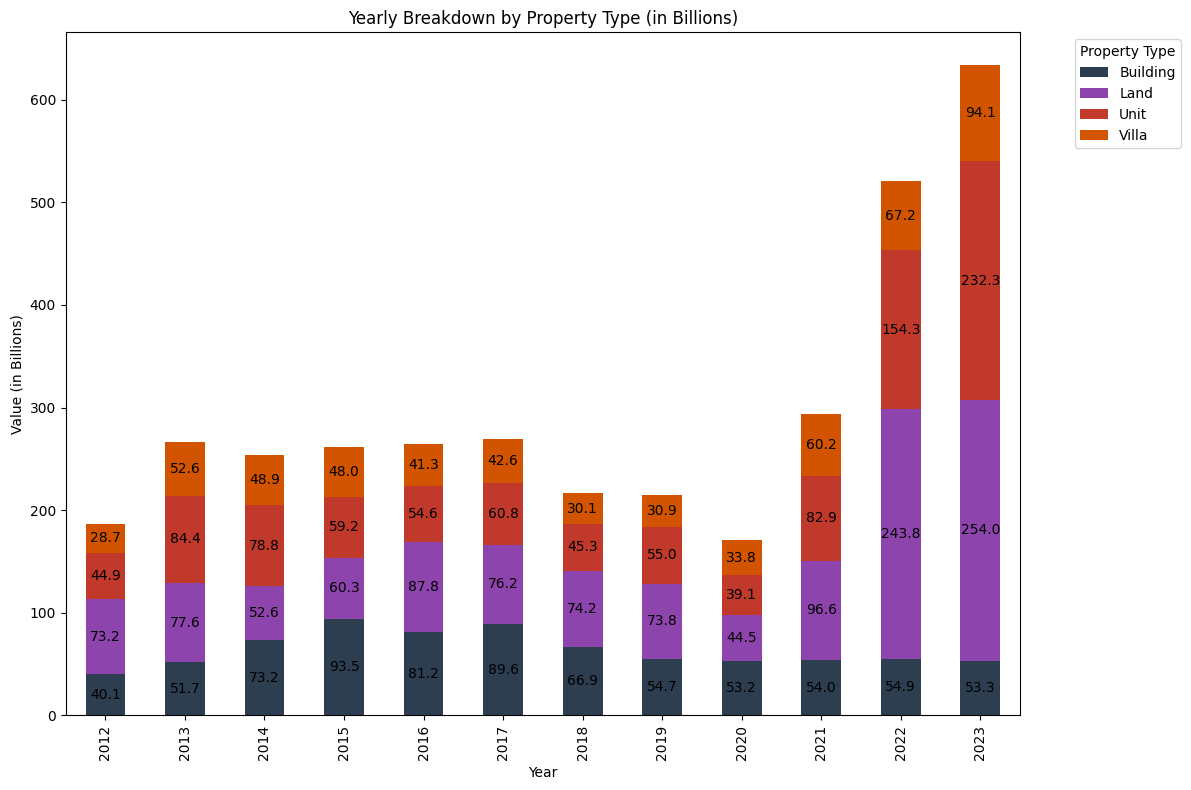

In [80]:
import matplotlib.pyplot as plt

# Convert actual_worth values to billions
pivot_table3.iloc[:, 1:] = pivot_table3.iloc[:, 1:].div(1e9)

# Plot stacked bar graph
plt.figure(figsize=(12, 8))
ax = pivot_table3.set_index('year').plot(kind='bar', stacked=True, color=['#2c3e50', '#8e44ad', '#c0392b', '#d35400'], figsize=(12, 8))

# Customize plot
plt.title('Yearly Breakdown by Property Type (in Billions)')
plt.xlabel('Year')
plt.ylabel('Value (in Billions)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10)

# Show plot
plt.show()


In [ ]:
df

In [81]:
# Convert 'instance_date' to datetime format
df['instance_date'] = pd.to_datetime(df['instance_date'])

# Extract year from 'instance_date'
df['year'] = df['instance_date'].dt.year

# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum4 = df.groupby(['year', 'trans_group_en'])['actual_worth'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table4 = df_yearly_sum4.pivot(index='year', columns='trans_group_en', values='actual_worth')

# Fill NaN values with 0 (optional)
# pivot_table['Hospitality'] = pivot_table['Hospitality']/1e6
# Display the pivot table
# pivot_table = pivot_table.drop('Residential/Commercial')
pivot_table4 = pivot_table4.reset_index()
pivot_table4

trans_group_en,year,Gifts,Mortgages,Sales
0,2012,3.729388e+09,1.097947e+11,7.333304e+10
1,2013,5.411036e+09,1.136525e+11,1.472338e+11
2,2014,6.644342e+09,1.064393e+11,1.404608e+11
3,2015,1.579247e+10,1.252194e+11,1.200631e+11
4,2016,1.894129e+10,1.365035e+11,1.094423e+11
5,2017,2.498605e+10,1.281078e+11,1.161044e+11
6,2018,2.322783e+10,1.184219e+11,7.483796e+10
7,2019,1.863918e+10,1.193197e+11,7.637883e+10
8,2020,1.475044e+10,8.591815e+10,6.992630e+10
9,2021,1.605856e+10,1.286331e+11,1.489608e+11


<Figure size 1200x800 with 0 Axes>

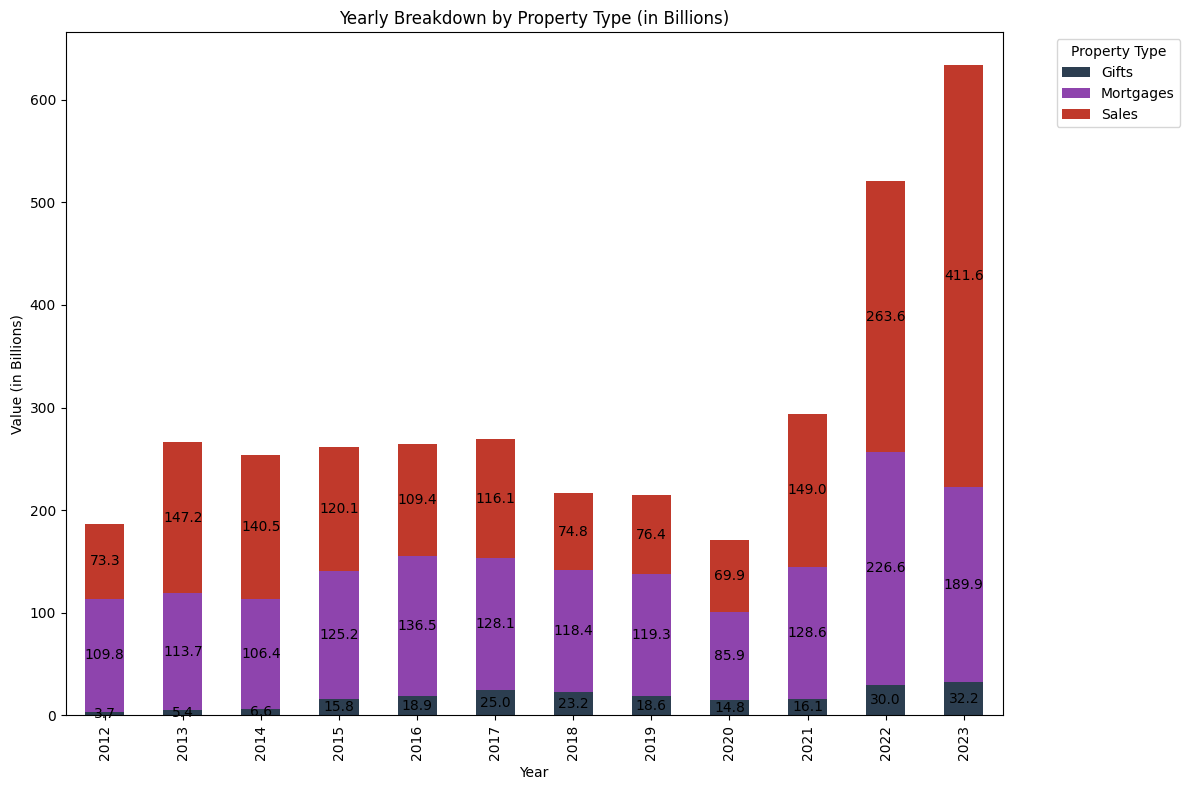

In [82]:

# Convert actual_worth values to billions
pivot_table4.iloc[:, 1:] = pivot_table4.iloc[:, 1:].div(1e9)

# Plot stacked bar graph
plt.figure(figsize=(12, 8))
ax = pivot_table4.set_index('year').plot(kind='bar', stacked=True, color=['#2c3e50', '#8e44ad', '#c0392b'], figsize=(12, 8))

# Customize plot
plt.title('Yearly Breakdown by Property Type (in Billions)')
plt.xlabel('Year')
plt.ylabel('Value (in Billions)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10)

# Show plot
plt.show()

In [ ]:
df  

In [84]:
# Convert 'instance_date' to datetime format
df['instance_date'] = pd.to_datetime(df['instance_date'])

# Extract year from 'instance_date'
df['year'] = df['instance_date'].dt.year

# Group by 'year' and 'property_usage_en', then sum 'actual_worth'
df_yearly_sum5 = df.groupby(['year', 'area_name_en'])['actual_worth'].sum().reset_index()

# Create pivot table with 'year' as index, 'property_usage_en' as columns, and sum of 'actual_worth' as values
pivot_table5 = df_yearly_sum5.pivot(index='year', columns='area_name_en', values='actual_worth')

# Fill NaN values with 0 (optional)
# pivot_table['Hospitality'] = pivot_table['Hospitality']/1e6
# Display the pivot table
# pivot_table = pivot_table.drop('Residential/Commercial')
pivot_table5 = pivot_table5.reset_index()
list(pivot_table5.columns)
print(list(pivot_table5.columns))


['year', 'Abu Hail', 'Al Aweer First', 'Al Aweer Second', 'Al Bada', 'Al Baraha', 'Al Barsha First', 'Al Barsha Second', 'Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barsha Third', 'Al Barshaa South First', 'Al Barshaa South Second', 'Al Barshaa South Third', 'Al Buteen', 'Al Dhagaya', 'Al Eyas', 'Al Garhoud', 'Al Goze First', 'Al Goze Fourth', 'Al Goze Industrial First', 'Al Goze Industrial Fourth', 'Al Goze Industrial Second', 'Al Goze Industrial Third', 'Al Goze Third', 'Al Hamriya', 'Al Hebiah Fifth', 'Al Hebiah First', 'Al Hebiah Fourth', 'Al Hebiah Second', 'Al Hebiah Sixth', 'Al Hebiah Third', 'Al Hudaiba', 'Al Jadaf', 'Al Jafliya', 'Al Karama', 'Al Khabeesi', 'Al Khairan First', 'Al Khawaneej First', 'Al Khawaneej Second', 'Al Kheeran', 'Al Kifaf', 'Al Layan1', 'Al Lusaily', 'Al Maha', 'Al Mamzer', 'Al Manara', 'Al Mararr', 'Al Marmoom', 'Al Merkadh', 'Al Mizhar First', 'Al Mizhar Second', 'Al Mizhar Third', 'Al Murqabat', 'Al Muteena', 'Al Nahda First', 'Al Nahda Sec

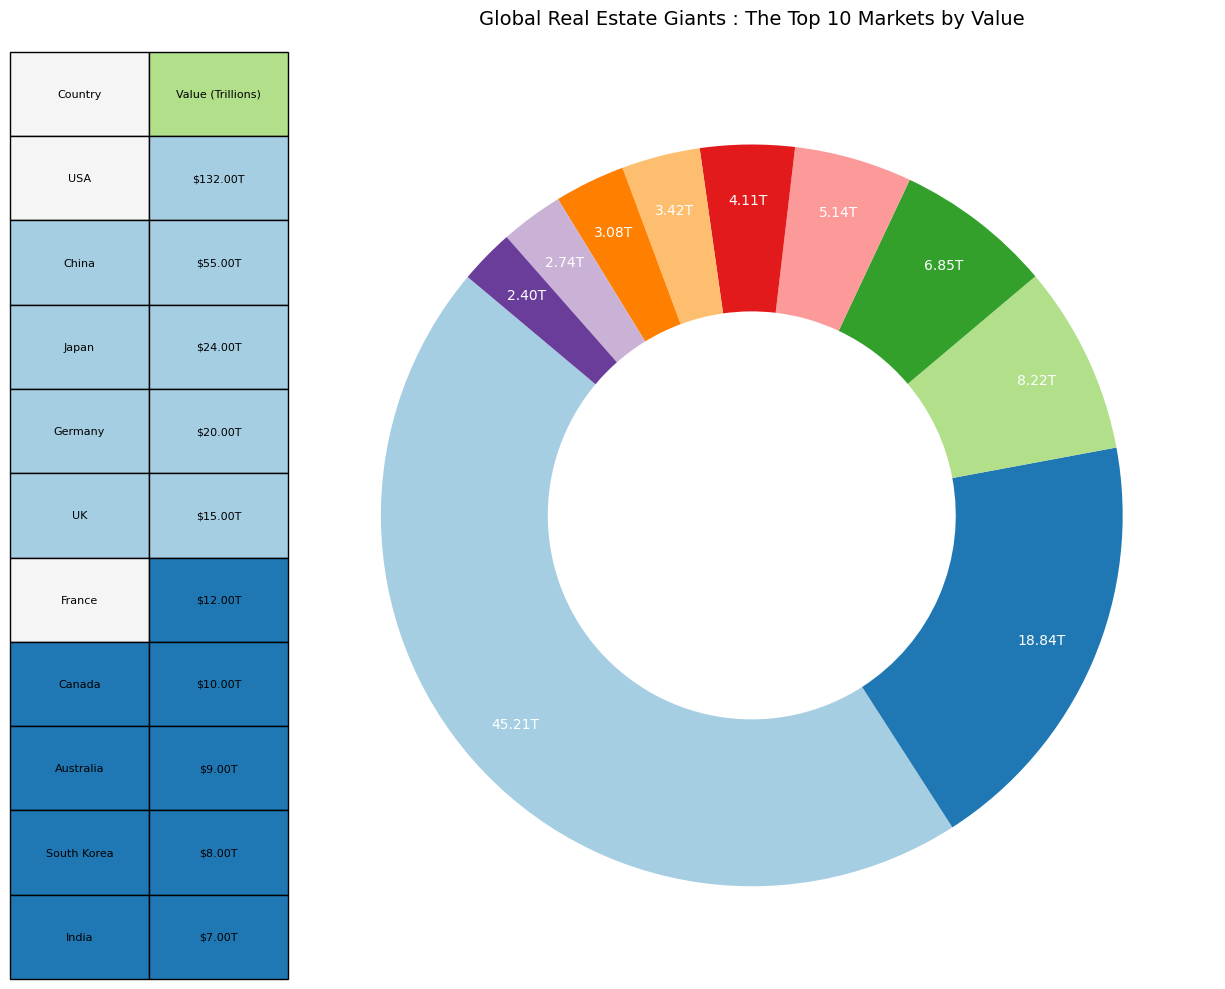

In [89]:
# Data
countries = ['USA', 'China', 'Japan', 'Germany', 'UK', 'France', 'Canada', 'Australia', 'South Korea', 'India']
values = [132, 55, 24, 20, 15, 12, 10, 9, 8, 7]  # Values in trillions

# Convert values to trillions with two decimal places
values_trillions = [f"${v:.2f}T" for v in values]

# Generate colors for each slice
colors = plt.cm.Paired(range(len(countries)))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the pie chart with a thicker ring
wedges, texts, autotexts = ax.pie(values, colors=colors, startangle=140, 
                                  wedgeprops=dict(width=0.45),  # Increased thickness by 50%
                                  autopct='%1.2fT',  # Show values inside the rings
                                  pctdistance=0.85)  # Position labels inside the ring

# Update autopct text colors to match segment colors
for autotext, color in zip(autotexts, colors):
    autotext.set_color('white')  # Text color inside the ring

# Create a table on the left side with matching colors
table_data = list(zip(countries, values_trillions))
table = plt.table(cellText=table_data, colLabels=['Country', 'Value (Trillions)'],
                  cellLoc='center', loc='left', bbox=[-0.3, 0, 0.3, 1], colColours=['#f5f5f5', '#f5f5f5'])

# Set table font size and color
table.auto_set_font_size(False)
table.set_fontsize(8)  # Reduce font size
for i, key in enumerate(table._cells.keys()):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if i % len(countries) == 0:  # Color header cells
        cell.set_facecolor('#f5f5f5')
    else:
        cell.set_facecolor(colors[i // len(countries)])
    cell.set_text_props(color='black')

# Add a title
plt.title('Global Real Estate Giants : The Top 10 Markets by Value', pad=20, fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


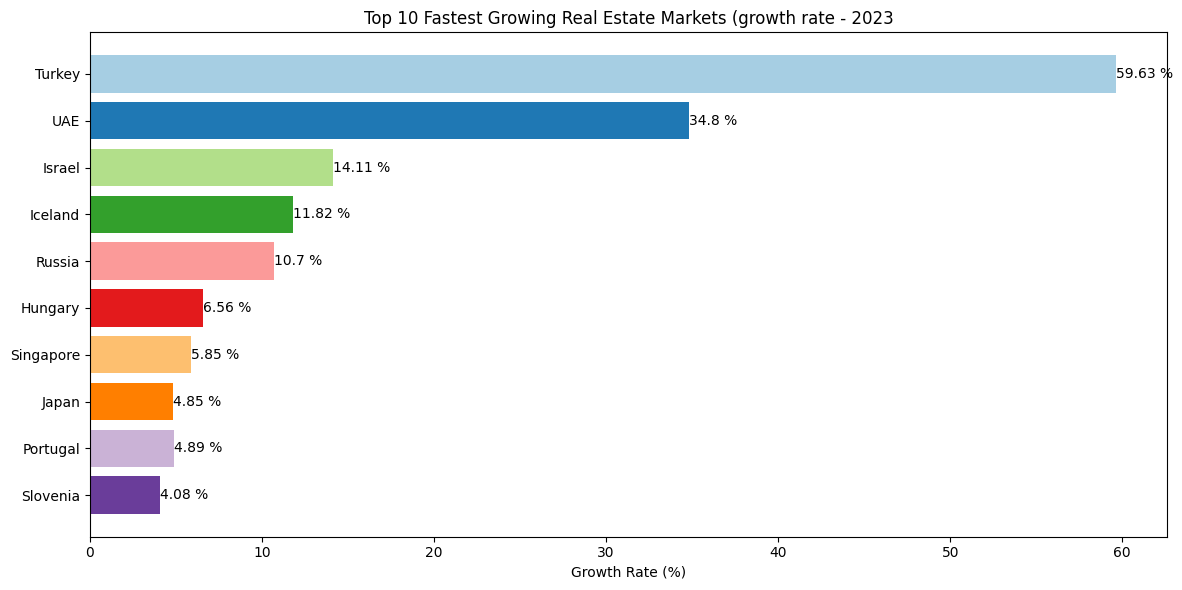

In [90]:
data = {
    'Country': ['Turkey', 'UAE', 'Israel', 'Iceland', 'Russia', 'Hungary', 'Singapore', 'Japan', 'Portugal', 'Slovenia'],
    'Growth Rate(T)': [59.63, 34.8, 14.11, 11.82, 10.7, 6.56, 5.85, 4.85, 4.89, 4.08]
}
df = pd.DataFrame(data)

# Define a list of colors for each bar
colors = plt.cm.Paired(range(len(df)))

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(df['Country'], df['Growth Rate(T)'], color=colors)

# Adding annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()} %', va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Growth Rate (%)')
plt.title('Top 10 Fastest Growing Real Estate Markets (growth rate - 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest value on top

# Ensure no grid lines are shown
plt.grid(False)

plt.tight_layout()
plt.show()


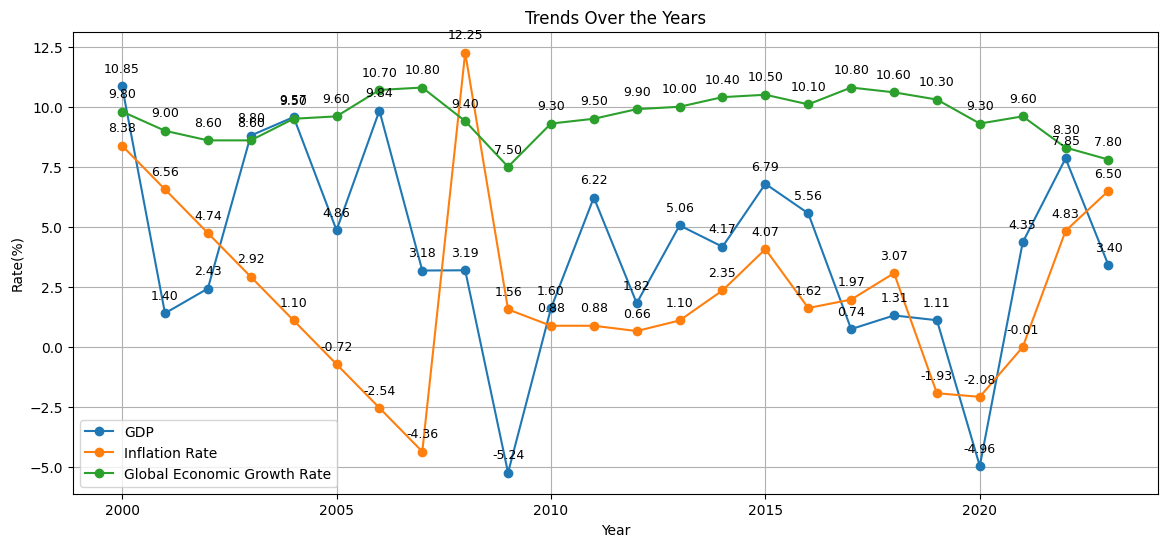

In [102]:

data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
             2020, 2021, 2022, 2023],
    'Gross Domestic Product': [10.85, 1.40, 2.43, 8.80, 9.57, 4.86, 9.84, 3.18, 3.19, -5.24, 
                                1.60, 6.22, 1.82, 5.06, 4.17, 6.79, 5.56, 0.74, 1.31, 1.11, 
                                -4.96, 4.35, 7.85, 3.40],
    'Inflation Rate': [8.38, 6.56, 4.74, 2.92, 1.10, -0.72, -2.54, -4.36, 12.25, 1.56, 
                       0.88, 0.88, 0.66, 1.10, 2.35, 4.07, 1.62, 1.97, 3.07, -1.93, 
                       -2.08, -0.01, 4.83, 6.50],
    'Population Growth Rate': [5.6, 5.3, 5.1, 4.8, 4.6, 7, 13.5, 18.1, 17.4, 13.4, 
                                5.9, 1.1, 1, 1, 1, 0.9, 0.9, 0.8, 0.8, 0.8, 
                                0.8, 0.8, 0.8, 0.8],
    'Infrastructure Development Rate': [80, 81, 81, 82, 82, 83, 83, 83, 83, 84, 
                                         84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 
                                         87, 88, 88, 88],
    'Energy Use Per Capita': [9624, 11639, 10974, 10287, 10481, 10394, 9430, 8538, 8488, 7501, 
                               7273, 7503, 7893, 7992, 7976, 7906, 7837, 7628, 7559, 7489, 
                               7420, 7350, 7325, 7285],
    'Global Economic Growth Rate': [9.8, 9, 8.6, 8.6, 9.5, 9.6, 10.7, 10.8, 9.4, 7.5, 
                                     9.3, 9.5, 9.9, 10, 10.4, 10.5, 10.1, 10.8, 10.6, 10.3, 
                                     9.3, 9.6, 8.3, 7.8],
    'Gross National Income': [0, 0, -1.4, 7.9, 10.1, 6.1, 10.6, 4.5, 1, -5.6, 
                               0.5, 6.3, 1.9, 5.1, 4.2, 7.1, 5.6, 0.9, 0.8, 1.3, 
                               -5.9, 2.3, 3.2, 3.1],
    'Unemployment Rate': [2.3, 2.4, 2.7, 2.9, 3, 3.1, 3, 2.9, 2.8, 2.9, 
                          2.8, 2.6, 2.3, 2.1, 2, 1.8, 1.6, 2.5, 2.2, 2.3, 
                          4.3, 3.1, 2.9, 2.7],
    'Foreign Direct Investment': [-0.5, 1.1, 0.1, 3.4, 6.8, 6, 5.8, 5.5, 1.6, 0.4, 
                                  2.9, 2, 2.5, 2.4, 2.7, 2.3, 2.6, 2.7, 2.4, 4.3, 
                                  5.7, 5, 4.5, 6.8]
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 6))
plt.plot(df['Year'], df['Gross Domestic Product'], label='GDP', color='tab:blue', marker='o')
plt.plot(df['Year'], df['Inflation Rate'], label='Inflation Rate', color='tab:orange', marker='o')
plt.plot(df['Year'], df['Global Economic Growth Rate'], label='Global Economic Growth Rate', color='tab:green', marker='o')

# Adding labels for each data point
for i, txt in enumerate(df['Gross Domestic Product']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Gross Domestic Product'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(df['Inflation Rate']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Inflation Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
for i, txt in enumerate(df['Global Economic Growth Rate']):
    plt.annotate(f'{txt:.2f}', (df['Year'][i], df['Global Economic Growth Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Rate(%)')
plt.title('Trends Over the Years')
plt.legend()
plt.grid(True)
plt.show()

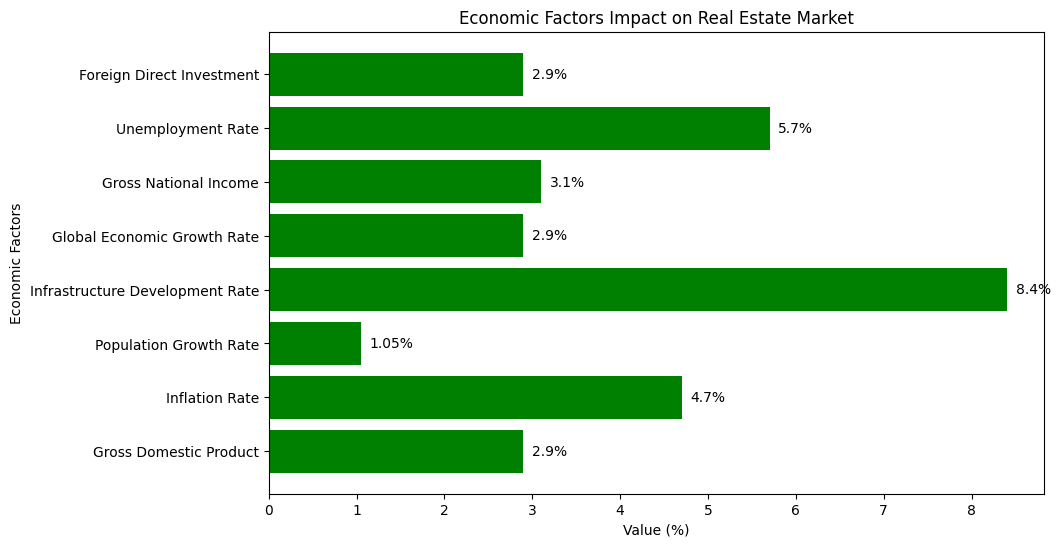

In [103]:
# Data representing economic factors and their values (excluding Energy Use Per Capita)
economic_factors = {
    'Factor': ['Gross Domestic Product', 'Inflation Rate', 'Population Growth Rate', 'Infrastructure Development Rate',
               'Global Economic Growth Rate', 'Gross National Income', 'Unemployment Rate', 'Foreign Direct Investment'],
    'Value': [2.9, 4.7, 1.05, 8.4, 2.9, 3.1, 5.7, 2.9]
}

# Creating a DataFrame
df = pd.DataFrame(economic_factors)

# Plotting the data with a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Factor'], df['Value'], color='green')

plt.title('Economic Factors Impact on Real Estate Market')
plt.xlabel('Value (%)')
plt.ylabel('Economic Factors')

# Adding percentage labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.1,  # Position of the label
             bar.get_y() + bar.get_height() / 2,  # Align the label vertically in the middle of the bar
             f'{bar.get_width()}%',  # Label text
             va='center')  # Vertical alignment

# Displaying the chart without gridlines
plt.show()



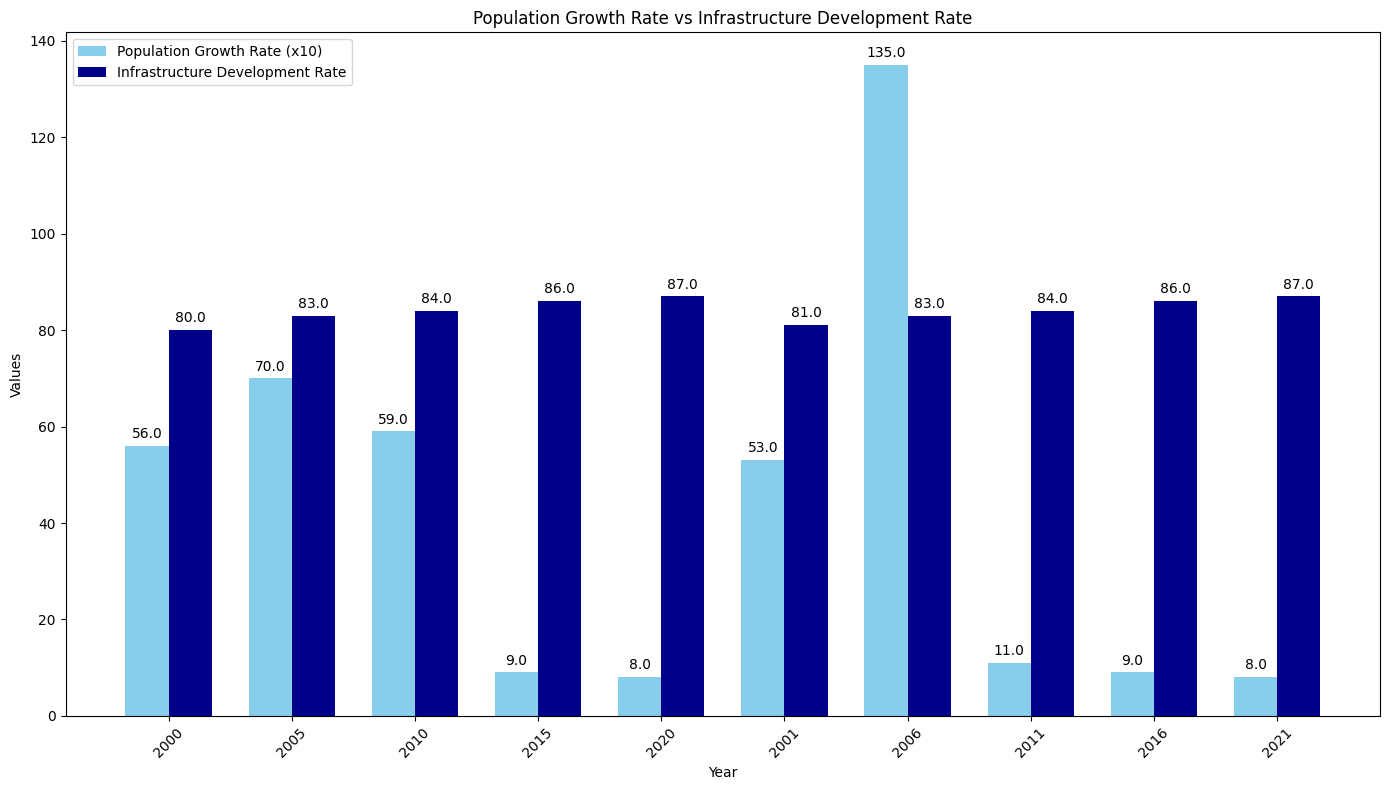

In [104]:
data = {
    'Year': [2000, 2005, 2010, 2015, 2020, 2001, 2006, 2011, 2016, 2021],
    'Population Growth Rate': [5.6, 7.0, 5.9, 0.9, 0.8, 5.3, 13.5, 1.1, 0.9, 0.8],
    'Infrastructure Development Rate': [80, 83, 84, 86, 87, 81, 83, 84, 86, 87]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Multiply Population Growth Rate by 10 for comparison
df['Population Growth Rate (x10)'] = df['Population Growth Rate'] * 10

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Set bar width
bar_width = 0.35
index = np.arange(len(df['Year']))

# Plot the bars
bars_population = ax1.bar(index - bar_width / 2, df['Population Growth Rate (x10)'], bar_width, color='skyblue', label='Population Growth Rate (x10)')
bars_infrastructure = ax1.bar(index + bar_width / 2, df['Infrastructure Development Rate'], bar_width, color='darkblue', label='Infrastructure Development Rate')

# Add labels to each bar
def add_labels(bars, is_percentage=False):
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.1f}'
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            label,
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

add_labels(bars_population)
add_labels(bars_infrastructure)

# Set labels, title, and legend
ax1.set_xlabel('Year')
ax1.set_ylabel('Values')
ax1.set_title('Population Growth Rate vs Infrastructure Development Rate')
ax1.set_xticks(index)
ax1.set_xticklabels(df['Year'], rotation=45)
ax1.legend(loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()


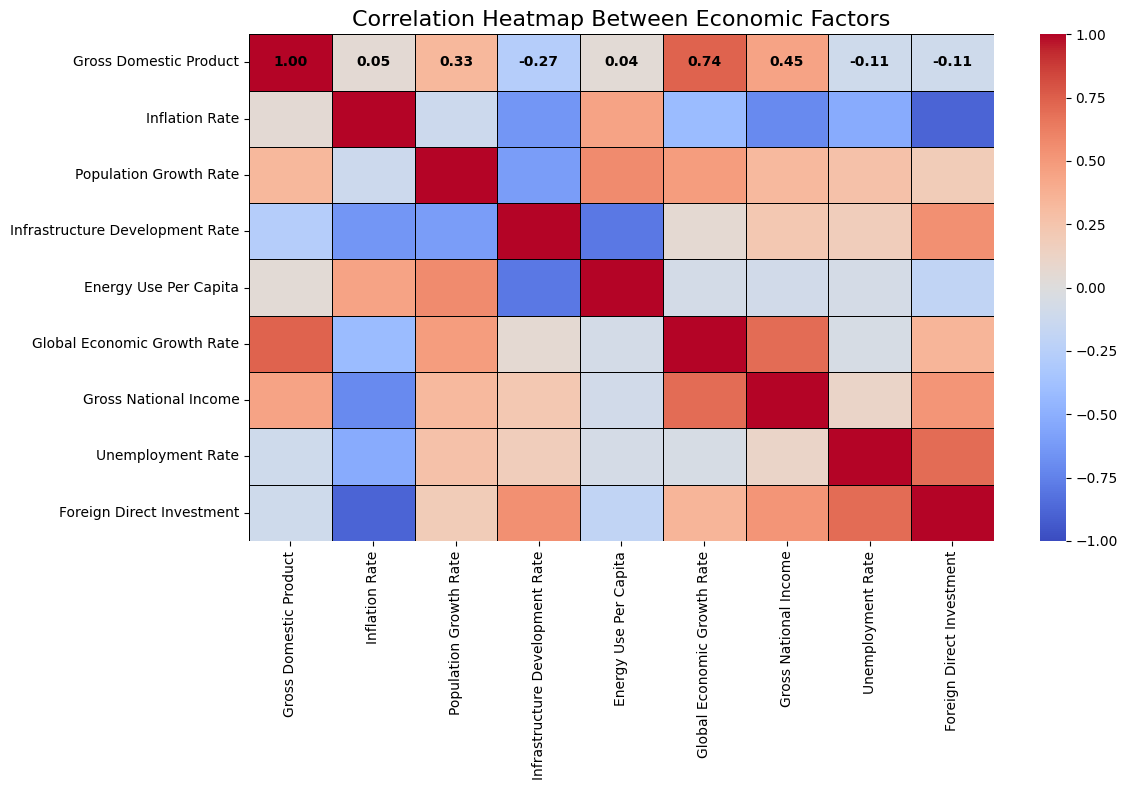

In [105]:
data = {
    'Year': [2000, 2005, 2010, 2015, 2020, 2001, 2006, 2011, 2016, 2021],
    'Gross Domestic Product': [10.85, 4.86, 1.60, 6.22, 4.35, 1.40, 9.84, 6.22, 5.56, 4.35],
    'Inflation Rate': [8.38, -0.72, 0.88, 0.66, -0.01, 6.56, -2.54, 0.88, 1.62, -0.01],
    'Population Growth Rate': [5.6, 7.0, 5.9, 0.9, 0.8, 5.3, 13.5, 1.1, 0.9, 0.8],
    'Infrastructure Development Rate': [80, 83, 84, 86, 87, 81, 83, 84, 86, 87],
    'Energy Use Per Capita': [9624, 10394, 7273, 7503, 7350, 11639, 9430, 7503, 7837, 7350],
    'Global Economic Growth Rate': [9.8, 9.6, 9.3, 9.5, 9.6, 9.0, 10.7, 9.5, 10.1, 9.6],
    'Gross National Income': [0, 6.1, 0.5, 6.3, 2.3, 0, 10.6, 6.3, 5.6, 2.3],
    'Unemployment Rate': [2.3, 3.1, 2.8, 2.6, 3.1, 2.4, 3.0, 2.6, 1.6, 3.1],
    'Foreign Direct Investment': [-0.5, 6, 2.9, 2.5, 5.7, 1.1, 5.8, 2.5, 2.6, 5]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Drop the 'Year' column as it's not part of the correlation analysis
df_corr = df.drop(columns='Year')

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0,
                      linewidths=0.5, linecolor='black', annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})

# Set the title
plt.title('Correlation Heatmap Between Economic Factors', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
